# Cuda setup
Check if cuda is available.

In [1]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


# Import data from source
METHOD 1: install yfinance in the environment hosting python and jupyter. I used Anaconda, and installed through conda terminal into my environment.

*pip install yfinance*

Use the yfinance API to retrieve company data

In [2]:
# yahoo finance api to collect stock data
import yfinance as yf
import os

# datetime imports to work with dates
from datetime import date
from dateutil.relativedelta import relativedelta

# alpaca api to collect stock data
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit

# Process data from csv files
Use pandas library for processing files

Use matplotlib to display graphs and visualizations.

Use torch to create and train a RNN model.

In [3]:
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim

from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.optim.lr_scheduler as lr_scheduler
%matplotlib inline

In [4]:
#Change directory for Lorne's jupyter notebook
# I am mixing windows and wsl on windows so I need to manaually change the directory, so you won't need to when you run it
if True:
    # See files in current directory
    import os

    current_directory = os.getcwd()
    print(current_directory)

    entries = os.listdir('.')
    files = [entry for entry in entries if os.path.isfile(entry)]

    for file_name in files:
        print(file_name)

    %cd "/mnt/c/Users/LPC/Documents/GitHub/CSCI611-NNSTOCKS"

    current_directory = os.getcwd()
    print(current_directory)

    entries = os.listdir('.')
    files = [entry for entry in entries if os.path.isfile(entry)]

    # Print the names of the files
    for file_name in files:
        print(file_name)

C:\Users\chr1s\Downloads
AMD1_intraday.csv
AMD_intraday.csv
AMD_intraday1.csv
AMD_intraday2.csv
AMD_intraday3.csv
build_cnn.ipynb
CSVsetup.ipynb
debug.log
desktop.ini
first_try.ipynb
ideaIU-2024.3.3.exe
MariaResearch.sql
model_trained.pt
openjfx-24.0.1_windows-x64_bin-sdk.zip
RNN (0721 Normalization no dropout).ipynb
RNN (0721).ipynb
RNN (0722).ipynb
RNN(2).ipynb
RNN(3).ipynb
RNN.ipynb
ubuntu-24.04.2-wsl-amd64.gz
untitled.txt
WebStorm-2024.3.3.exe
[WinError 3] The system cannot find the path specified: '/mnt/c/Users/LPC/Documents/GitHub/CSCI611-NNSTOCKS'
C:\Users\chr1s\Downloads
C:\Users\chr1s\Downloads
AMD1_intraday.csv
AMD_intraday.csv
AMD_intraday1.csv
AMD_intraday2.csv
AMD_intraday3.csv
build_cnn.ipynb
CSVsetup.ipynb
debug.log
desktop.ini
first_try.ipynb
ideaIU-2024.3.3.exe
MariaResearch.sql
model_trained.pt
openjfx-24.0.1_windows-x64_bin-sdk.zip
RNN (0721 Normalization no dropout).ipynb
RNN (0721).ipynb
RNN (0722).ipynb
RNN(2).ipynb
RNN(3).ipynb
RNN.ipynb
ubuntu-24.04.2-wsl-amd64.

# Helper functions
StockDataset class to hold pytorch data

In [5]:
#HYPERPARAMETER
training_percentage = 6
#HYPERPARAMETER
valid_percentage = 2
#HYPERPARAMETER
testing_percentage = 2
class StockDataset(torch.utils.data.Dataset[float]):
    def __init__(self, sequences, targets):
        super(StockDataset).__init__()
        self.sequences = sequences
        self.targets = targets
    def __len__(self):
        return len(self.sequences)    
    def __getitem__(self, index):
        sequence = torch.tensor(self.sequences[index], dtype=torch.float32).unsqueeze(-1)#sequence at index 
        target = torch.tensor(self.targets[index], dtype=torch.float32)#test_value at index
        return sequence, target
        
class RNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=128, num_layers=2, nonlinearity='tanh', bias=True, batch_first=True, dropout=0.0):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, nonlinearity=nonlinearity, bias=bias, 
            batch_first=batch_first, dropout=dropout, bidirectional=False, device=None, dtype=None)
        self.fc = nn.Linear(128, 1)
        
    def forward(self, x):
        #self.dropout = nn.Dropout(p=0.5)
        self.output, self.hidden = self.rnn(x)
        prediction = self.fc(self.output[:, -1, :])
        return prediction.squeeze(-1)

# get_yahoo_stock_data(name, interval="5m", period="7d")

unction that calls yfinance to get stock data from a defined time period

@params stock_name: name of the stock to get data for

@params interval: interval of the data, default is 15 minutes

@params months: number of months to get data for

In [6]:
# Generate stock price data from yahoo finance 
def get_yahoo_stock_data(name, interval="5m", period="7d"):
    data = yf.download(name, interval=interval, period=period)
    return data

# get_alpaca_stock_data(name, interval="15", months="6") 

function calls alpaca api to get stock data for a defined time period starting from June 1st 2021

@params stock_name: name of the stock to get data for

@params interval: interval of the data, default is 15 minutes

@params months: number of months to get data for

In [7]:
# Generate stock price data from alpaca
def get_alpaca_stock_data(name, interval="15", months="6"):
    name_of_file = name + "_intraday1.csv"

    start_date = date(2021, 6, 1)
    end_date = start_date + relativedelta(months=int(months))  # Adds months

    api = REST('PKJ41QP5QU0TYS4S1BYB', 'o5HVFGx0XWSMoMyeQdRJwG1apYXtuMNcguWpjqqe')

    data = api.get_bars(name, TimeFrame(int(interval), TimeFrameUnit.Minute), start_date, end_date, adjustment='raw').df

    data = data.rename(columns={"close": "Close", "open": "Price", "high": "High", "low": "Low", "volume": "Volume", "datetime": "Datetime", "ticker": "Ticker"})

    data.to_csv(name_of_file)

    return name_of_file

# plot_loss(training_loss_array, validation_loss_array, epochs)

Creates a matplotlib plot of the training and validation loss

@params training_loss_array: Array of training loss values

@params validation_loss_array: Array of validation loss values

@params epochs: Number of epochs

In [8]:
# Creates a matplotlib plot of the training and validation loss
def plot_loss(training_loss_array, validation_loss_array, epochs):
    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot training loss
    plt.plot(range(1, int((epochs)/10) + 1), training_loss_array, marker='o', linestyle='-', color='b', label='Training Loss')

    # Plot validation loss
    plt.plot(range(1, int((epochs)/10) + 1), validation_loss_array, marker='x', linestyle='--', color='r', label='Validation Loss')

    # Add title and labels
    plt.title('Training vs Validation Loss Over Epochs')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')

    # Add grid and legend
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    # Add x-axis ticks
    plt.xticks(range(1, (int((epochs + 1)/10)+1), 1))

    # Show the plot
    plt.show()

# plot_target_vs_predicted_values(target_values_array, predicted_values_array, batch_size)

Creates a matplotlib plot of the target values vs the predicted values.

@params target_values_array: Array of actual real values of selected stock for testing phase of RNN

@params predicted_values_array: Array of predicted values generated by RNN

@params batch_size: Number of values in target_values_array and predicted_values_array

In [9]:
# Creates a matplotlib plot of the training and validation loss
def plot_target_vs_predicted_values(target_values_array, predicted_values_array, batch_size):
    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot target values
    plt.plot(range(1, batch_size + 1), target_values_array, marker='o', linestyle='-', color='b', label='Target Values')

    # Plot predicted values
    plt.plot(range(1, batch_size + 1), predicted_values_array, marker='x', linestyle='--', color='r', label='Predicted Values')

    # Add title and labels
    plt.title('Target vs Predicted Stock Values')
    plt.xlabel('Time')
    plt.ylabel('Stock Value')

    # Add grid and legend
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    # Add x-axis ticks
    plt.xticks(range(1, batch_size, 1))

    # Show the plot
    plt.show()

# standardize_2d(data)

Standardize the data in a 2D array feed to RNN. It standardizes the data by subtracting the mean and dividing by the standard deviation.

@params data: 2D array of data to be standardized

@returns: Standardized 2D array

In [10]:
def standardize_2d(data):
    # Get the average
    average_val = np.mean(data)
    # Get the standard deviation
    std_val = np.std(data)
    # Subtract the average and divide by the standard deviation
    standardized_data = (data - average_val) / std_val
    return standardized_data

# Display relevant information for formatting purposes

In [11]:
class RNN_initializer:
    #HYPERPARAMETER
    def __init__(self, retrieve, name, recomp, nval, ival, pval, sequence_len, batch_size, num_workers, epochs, learning_rate, lr_scheduler_rate, beta1, beta2):
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.learning_rate = learning_rate
        self.lr_scheduler_rate = lr_scheduler_rate
        self.beta1 = beta1
        self.beta2 = beta2
        # Get stock data
        if(retrieve == True):
            if (stock_data_source == "yahoo"):
                self.csv_name = self.retrieve_csv(name, recomp, nval, str(ival[0])+ival[1], str(pval[0])+pval[1])
            else:
                self.csv_name = get_alpaca_stock_data(name, stock_interval, stock_period)
        else:
            self.csv_name = name
        # We read the CSV createed from the Stock API functions
        self.df=pd.read_csv(name + "_intraday1.csv")
        #format data, and prepare it for RNN
        if(stock_data_source == "yahoo"):
            price = self.df['Close'].to_list()[2:]
            self.axis_labels = self.df['Price'].to_list()[2:]
        else:
            price = self.df['Close'].to_list()[1:]
            self.axis_labels = self.df['Price'].to_list()[1:]
        date_format_with_time = "%Y-%m-%d %H:%M:%S"
        # Input the data
        price_inputs = [float(x) for x in price]
        # Standardize the data by subtracting the mean of the data and dividing by the standard deviation of the data
        price_inputs = standardize_2d(price_inputs)
        sequence_length = sequence_len
        #Training sets
        train_seq = []
        train_tar = []
        #Validation sets
        valid_seq = []
        valid_tar = []
        #Testing sets
        test_seq = []
        test_tar = []
        # Choose a selected time range
        #HYPERPARAMETERS
        train_range = (len(price_inputs)//10 * training_percentage)
        valid_range_beg = train_range
        valid_range_end = train_range + (len(price_inputs)//10 * valid_percentage)
        test_range_beg = valid_range_end
        test_range_end = valid_range_end + (len(price_inputs)//10 * testing_percentage)
        
        # Generate sequences and targets list for loading data
        for i in range(train_range - sequence_length):
            seq = price_inputs[i:i+sequence_length]
            train_seq.append(seq)
            temp = price_inputs[i+sequence_length]
            train_tar.append(temp)
        for j in range(valid_range_beg, valid_range_end-sequence_length):
            seq = price_inputs[j:j+sequence_length]
            valid_seq.append(seq)
            temp = price_inputs[j+sequence_length]
            valid_tar.append(temp)
        for k in range(test_range_beg, test_range_end-sequence_length):
            seq = price_inputs[k:k+sequence_length]
            test_seq.append(seq)
            temp = price_inputs[k+sequence_length]
            test_tar.append(temp)
        # Set up the data loaders for training data and validation data and testing data
        train_data = StockDataset(train_seq, train_tar)
        valid_data = StockDataset(valid_seq, valid_tar)
        test_data = StockDataset(test_seq, test_tar)
        # Load training, validation, and testing data
        self.train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
        self.valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers)
        self.test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)
    # retreive_csv is a file that allows the user to extract stock data from yahoo finance.
    # @param: name, name of file
    # @param: recomp, indicates if file needs to be recompiled
    # @param: num, indicates which file need to be recompiled
    def retrieve_csv(self, name, recomp, nval, ival, pval):
        # Example: Get 1-minute intraday data for Apple (AAPL) for 1 day
        data = get_yahoo_stock_data(stock_name, stock_interval, stock_period)
        ext = ".csv"
        pt2 = "_intraday"
        num = 1
        file_name = name + pt2 + str(num) + ext
        found = False
        if(recomp!=True):
            while(found!=True):
                if os.path.isfile(file_name):
                    num+=1
                    file_name = name + pt2 + str(num) + ext
                else:
                    found = True
        else:
            if(nval >= 1):
                file_name = name + pt2 + str(nval) + ext
            else:
                file_name = name + pt2 + ext
        data.to_csv(file_name)
        return file_name

    def display_fig(self):
        plt.figure(figsize=(20, 20))
        plt.title(name + " Intraday Stock Price")
        plt.plot(self.axis_labels, self.price_inputs)
        plt.xlabel("time")
        plt.ylabel("price")
        plt.xticks(self.axis_labels[::26])
        plt.yticks(self.price_inputs[::30])
        plt.show()

    def show_df_info(self):
        self.df.head(15)
        self.df.tail(10)
        print("Row count: " + str(len(self.df)))
    def init_RNN(self):
        rnn = RNN()
        return rnn
    def trainAndTest(self, rnn):
        #RNN model
        #Get minimum loss
        min_loss = np.inf
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            rnn.cuda()
        # Use MSELoss instead of MSEAbsoluteLoss (predicting next price compared to next change)
        error = nn.MSELoss()
        # Specify optimizer
        optimizer = torch.optim.Adam(rnn.parameters(), lr=self.learning_rate, betas=(beta1, beta2))
        #optimizer = optim.SGD(model.parameters(), lr=0.01)
        #self.price_tensor = torch.tensor(self.sequences, dtype=torch.float32).unsqueeze(-1)#input 
        #self.y_tensor = torch.tensor(self.test_vals, dtype=torch.float32)#test_values
        
        # Learning rate scheduler, decreases over time
        scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=self.lr_scheduler_rate, patience=10)
        # Variable to keep track of the minimum validation loss
        valid_loss_min = np.inf
        for epoch in range(epochs):
            train_loss = 0.0
            valid_loss = 0.0
            #TRAINING
            rnn.train()
            for batch_idx, (data, target) in enumerate(self.train_loader):
                # Move tensors to GPU if CUDA is available
                if train_on_gpu:
                    data, target = data.cuda(), target.cuda()
                # Clear the gradients of all optimized variables
                optimizer.zero_grad()
                # Forward pass: compute predicted outputs by passing inputs to the model
                output = rnn(data)
                # Calculate the batch loss
                loss_train = error(output, target)
                # Backward pass: compute gradient of the loss with respect to model parameters
                loss_train.backward()
                # Perform a single optimization step (parameter update)
                optimizer.step()
                train_loss += loss_train.item()*data.size(0)
                if (loss_train < min_loss):
                    min_loss = loss_train
                    #torch.save(rnn.state_dict(), "rnn.pth")
            # Update learning rate
            scheduler.step(train_loss)  # Update learning rate

    
            ######################    
            # validate the model #
            ######################
            rnn.eval()
            for batch_idx, (data, target) in enumerate(self.valid_loader):
                # Move tensors to GPU if CUDA is available
                if train_on_gpu:
                    data, target = data.cuda(), target.cuda()
                # Forward pass: compute predicted outputs by passing inputs to the model
                output = rnn(data)
                # Calculate the batch loss
                loss_valid = error(output, target)
                # Perform a single optimization step (parameter update)
                valid_loss += loss_valid.item()*data.size(0)
                if (loss_valid < min_loss):
                    min_loss = loss_valid
                    #torch.save(rnn.state_dict(), "rnn.pth")
            # Calculate average losses
            train_loss = train_loss/len(self.train_loader.dataset)
            valid_loss = valid_loss/len(self.valid_loader.dataset)
            # Save model if validation loss has decreased
            if valid_loss <= valid_loss_min and (epoch+1) % 10 == 0:
                print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
                torch.save(rnn.state_dict(), 'model_trained.pt')
                valid_loss_min = valid_loss
            #remove +1 possibly
            # Print training and validation loss every 10 epochs
            if (epoch) % 10 == 0:
                lr = optimizer.param_groups[0]["lr"]
                print(f"Epoch {epoch+1}/{epochs}, Training Loss: {loss_train.item():.6f}, Validation Loss: {loss_valid.item():.6f}")
                training_loss_array.append(float(loss_train.item()))
                validation_loss_array.append(float(loss_valid.item()))
        # Return the minimum loss
        return min_loss
        


In [12]:
#Stock variables used when collecting stock data
#Choose which api to use to grab stock data, either "yahoo" or "alpaca"
stock_data_source = "alpaca"
sequence_len = 4
#Loss array used to store loss values for each 10 epochs, reset each set of hyperparameters
training_loss_array = []
validation_loss_array = []
test_loss = np.inf

#HYPERPARAMETER
#Stock variables when using yahoo finance api
if stock_data_source == "yahoo":
    stock_name = "AMD"
    stock_interval="5m"
    stock_period="7d"
    epochs = 100
    lr_scheduler_rate = 0.8
    beta1 = 0.9
    beta2 = 0.999

#HYPERPARAMETER
#Stock variables when using alpaca api
if stock_data_source == "alpaca":
    stock_name = "AMD"
    stock_interval="15"
    stock_period="12" #months
    epochs = 150
    lr_scheduler_rate = 0.1
    beta1 = 0.9
    #changed
    #beta1 = 0.95
    beta2 = 0.999

batch_size = 16
num_workers = 0

# Setting up control

In [13]:
rnnControlSetup = RNN_initializer(retrieve=True, name=stock_name, recomp=True, nval=1, ival=[5, "m"], 
    pval=[7,"d"],sequence_len=sequence_len, batch_size=16, num_workers=0, epochs=150, learning_rate=0.001, 
    lr_scheduler_rate=0.1, beta1=0.9, beta2=0.999)
rnnControl = rnnControlSetup.init_RNN()

# Test the lr change



-------------------------------------------------------------------------------
Learning rate:  0.005    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.633762).  Saving model ...
Epoch 10/150, Training Loss: 0.044012, Validation Loss: 0.585266
Epoch 20/150, Training Loss: 0.203317, Validation Loss: 1.868438
Epoch 30/150, Training Loss: 0.012146, Validation Loss: 0.752178
Validation loss decreased (0.633762 --> 0.238118).  Saving model ...
Epoch 40/150, Training Loss: 0.642775, Validation Loss: 0.029464
Epoch 50/150, Training Loss: 0.845506, Validation Loss: 0.003236
Epoch 60/150, Training Loss: 0.878246, Validation Loss: 0.001724
Epoch 70/150, Training Loss: 0.881917, Validation Loss: 0.001595
Epoch 80/150, Training Loss: 0.882332, Validation Loss

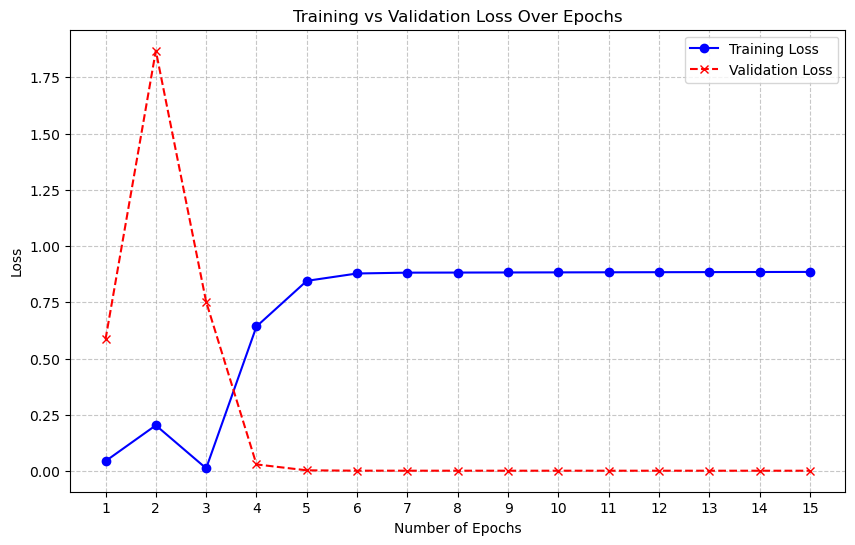



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 1.302941).  Saving model ...
Epoch 10/150, Training Loss: 0.060549, Validation Loss: 1.362849
Validation loss decreased (1.302941 --> 1.078134).  Saving model ...
Epoch 20/150, Training Loss: 0.157836, Validation Loss: 1.192179
Validation loss decreased (1.078134 --> 0.006850).  Saving model ...
Epoch 30/150, Training Loss: 0.000452, Validation Loss: 0.008195
Epoch 40/150, Training Loss: 0.001743, Validation Loss: 0.006827
Epoch 50/150, Training Loss: 0.004588, Validation Loss: 0.002635
Epoch 60/150, Training Loss: 0.004468, Validation Loss: 0.002405
Epoch 70/150, Training Loss: 0.004394, Validation 

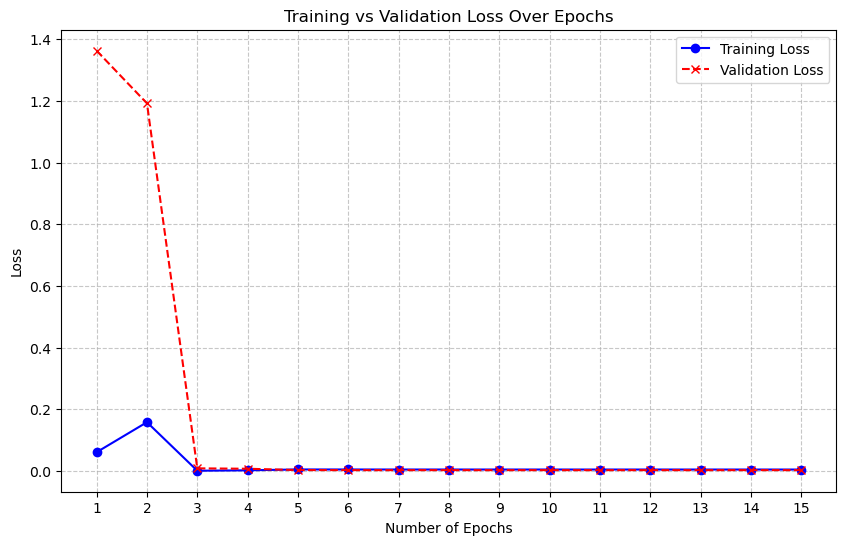



-------------------------------------------------------------------------------
Learning rate:  0.0005    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.322040).  Saving model ...
Epoch 10/150, Training Loss: 0.144388, Validation Loss: 0.360586
Validation loss decreased (0.322040 --> 0.023140).  Saving model ...
Epoch 20/150, Training Loss: 0.063818, Validation Loss: 0.003063
Validation loss decreased (0.023140 --> 0.003181).  Saving model ...
Epoch 30/150, Training Loss: 0.008706, Validation Loss: 0.000650
Validation loss decreased (0.003181 --> 0.001256).  Saving model ...
Epoch 40/150, Training Loss: 0.001135, Validation Loss: 0.000553
Validation loss decreased (0.001256 --> 0.001094).  Saving model ...
Epoch 50/150, Training Loss: 0.000675, Va

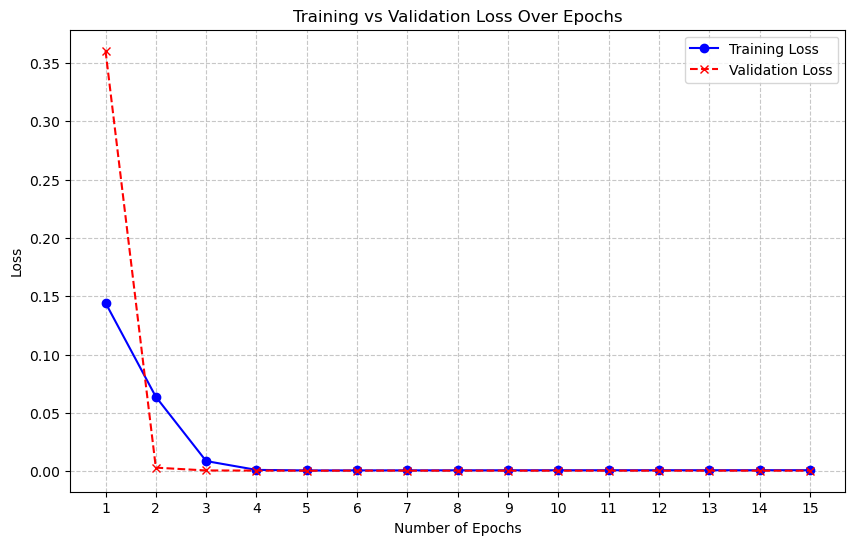



-------------------------------------------------------------------------------
Learning rate:  0.0001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.006107).  Saving model ...
Epoch 10/150, Training Loss: 0.006972, Validation Loss: 0.003604
Epoch 20/150, Training Loss: 0.012853, Validation Loss: 0.000863
Validation loss decreased (0.006107 --> 0.003673).  Saving model ...
Epoch 30/150, Training Loss: 0.007762, Validation Loss: 0.000740
Validation loss decreased (0.003673 --> 0.002573).  Saving model ...
Epoch 40/150, Training Loss: 0.004901, Validation Loss: 0.000615
Validation loss decreased (0.002573 --> 0.002062).  Saving model ...
Epoch 50/150, Training Loss: 0.003452, Validation Loss: 0.000535
Validation loss decreased (0.002062 --> 0.001

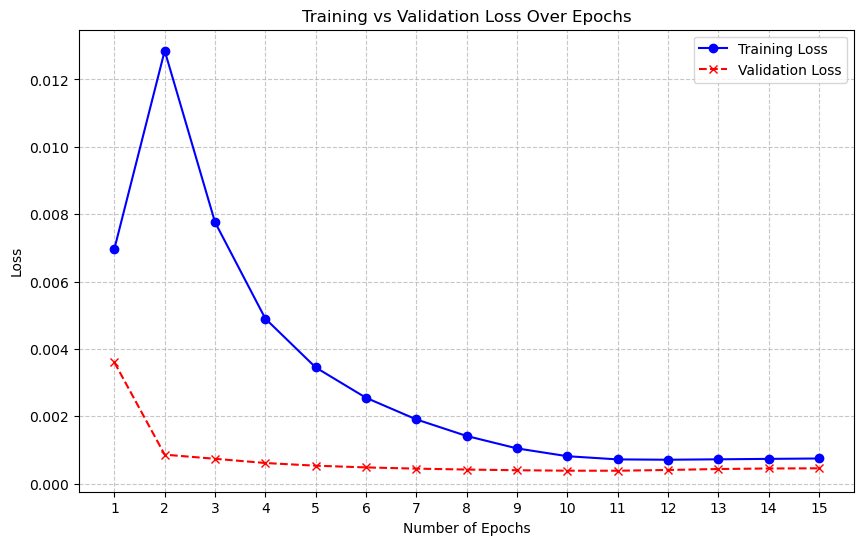



-------------------------------------------------------------------------------
Learning rate:  5e-05    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.003623).  Saving model ...
Epoch 10/150, Training Loss: 0.003732, Validation Loss: 0.001162
Validation loss decreased (0.003623 --> 0.002743).  Saving model ...
Epoch 20/150, Training Loss: 0.002785, Validation Loss: 0.000587
Validation loss decreased (0.002743 --> 0.002346).  Saving model ...
Epoch 30/150, Training Loss: 0.002430, Validation Loss: 0.000504
Validation loss decreased (0.002346 --> 0.002040).  Saving model ...
Epoch 40/150, Training Loss: 0.002165, Validation Loss: 0.000466
Validation loss decreased (0.002040 --> 0.001783).  Saving model ...
Epoch 50/150, Training Loss: 0.001930, Val

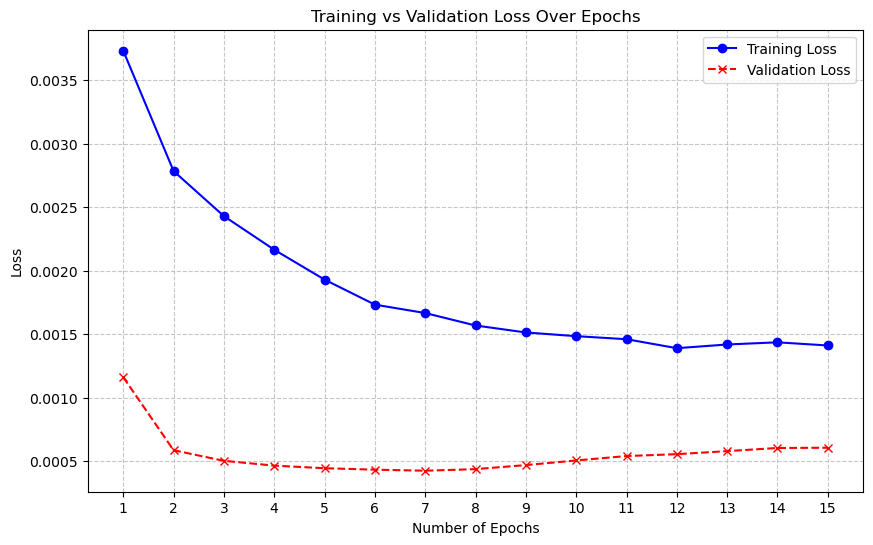



-------------------------------------------------------------------------------
Learning rate:  1e-05    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.004041).  Saving model ...
Epoch 10/150, Training Loss: 0.008392, Validation Loss: 0.000613
Validation loss decreased (0.004041 --> 0.002753).  Saving model ...
Epoch 20/150, Training Loss: 0.004148, Validation Loss: 0.000551
Validation loss decreased (0.002753 --> 0.002332).  Saving model ...
Epoch 30/150, Training Loss: 0.002941, Validation Loss: 0.000505
Validation loss decreased (0.002332 --> 0.002082).  Saving model ...
Epoch 40/150, Training Loss: 0.002276, Validation Loss: 0.000474
Validation loss decreased (0.002082 --> 0.001900).  Saving model ...
Epoch 50/150, Training Loss: 0.001852, Val

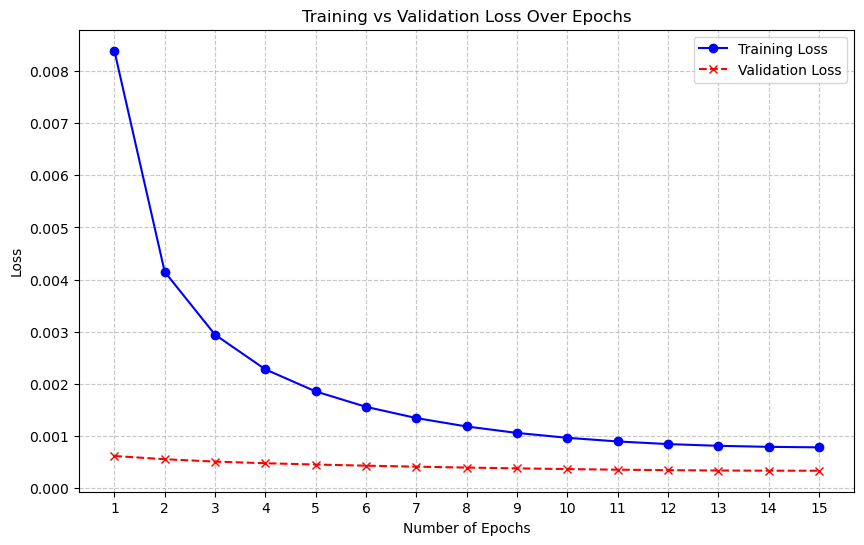



Best learning rate:  1e-05    Loss:  tensor(1.4855e-06, device='cuda:0', grad_fn=<MseLossBackward0>)
Second best learning rate:  0.001    Loss:  tensor(1.6066e-06, device='cuda:0', grad_fn=<MseLossBackward0>)


In [14]:
skip_this_step = False

if not skip_this_step:
    #test various learning rates
    learning_rate_list = [0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001] #revert later for hyperparameter testing, the first few values are not good current set of hyperparameters
    #learning_rate_list = [0.0005, 0.0001, 0.00005, 0.00001]
    best_lr = [[np.inf, np.inf] , [np.inf, np.inf]] #record two pairs of [loss, learning rate] to tune learning rate later
    best_lr_in_loop = np.inf # Capture best learning rate in the loop
    repeated_loops_per_lr = 1
    bestRNN_lr_Setup = [rnnControlSetup,None]
    bestRNN_lr = [rnnControl,None]
    bestRNN_in_loop = rnnControl
    #lr testing
    for lr in learning_rate_list:
        print("\n\n-------------------------------------------------------------------------------")
        print("Learning rate: ", lr, "   Loop: ", repeated_loops_per_lr)
        print(stock_name, "Time interval ", stock_interval, "min", "Time period: ", stock_period, 'months')
        print("Batch size: ", batch_size, "Number of workers: ", num_workers, "Epochs: ", epochs)
        print("Learning rate scheduler rate: ", lr_scheduler_rate)
        print("Beta1: ", beta1, "Beta2: ", beta2)
        print("-------------------------------------------------------------------------------")
        rnnSetup = RNN_initializer(retrieve=False, name=stock_name, recomp=True, nval=1, ival=[5, "m"], pval=[7,"d"], sequence_len=sequence_len, batch_size=batch_size, num_workers=num_workers, epochs=epochs, learning_rate=lr, lr_scheduler_rate=lr_scheduler_rate, beta1=beta1, beta2=beta2)
        for i in range(repeated_loops_per_lr):
            rnn = rnnSetup.init_RNN()
            #returns
            training_loss_array = []
            validation_loss_array = []
            loss = rnnSetup.trainAndTest(rnn)
            if best_lr_in_loop > loss:
                best_lr_in_loop = loss
                bestRNN_in_loop = rnn
        #if found best lr, remove worst lr from list
        if best_lr_in_loop < best_lr[0][0]:
            best_lr[1] = best_lr[0]
            best_lr[0] = [best_lr_in_loop, lr]
            bestRNN_lr[1] = bestRNN_lr[0]
            bestRNN_lr[0] = bestRNN_in_loop
            bestRNN_lr_Setup[1] =  bestRNN_lr_Setup[0] 
            bestRNN_lr_Setup[0] =  rnnSetup
            #if 
        elif best_lr_in_loop < best_lr[1][0]:
            best_lr[1] = [best_lr_in_loop, lr]
            bestRNN_lr[1] = bestRNN_in_loop
            bestRNN_lr_Setup[1] =  rnnSetup
        best_lr_in_loop = np.inf

        plot_loss(training_loss_array, validation_loss_array, epochs)

    print("\n\nBest learning rate: ", best_lr[0][1], "   Loss: ", best_lr[0][0])
    print("Second best learning rate: ", best_lr[1][1], "   Loss: ", best_lr[1][0])

skip_this_step = False

# Test beta1 value effect



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.45 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.003740).  Saving model ...
Epoch 10/150, Training Loss: 0.007120, Validation Loss: 0.000637
Validation loss decreased (0.003740 --> 0.002806).  Saving model ...
Epoch 20/150, Training Loss: 0.003831, Validation Loss: 0.000571
Validation loss decreased (0.002806 --> 0.002446).  Saving model ...
Epoch 30/150, Training Loss: 0.002781, Validation Loss: 0.000524
Validation loss decreased (0.002446 --> 0.002207).  Saving model ...
Epoch 40/150, Training Loss: 0.002180, Validation Loss: 0.000489
Validation loss decreased (0.002207 --> 0.002027).  Saving model ...
Epoch 50/150, Training Loss: 0.001798, Va

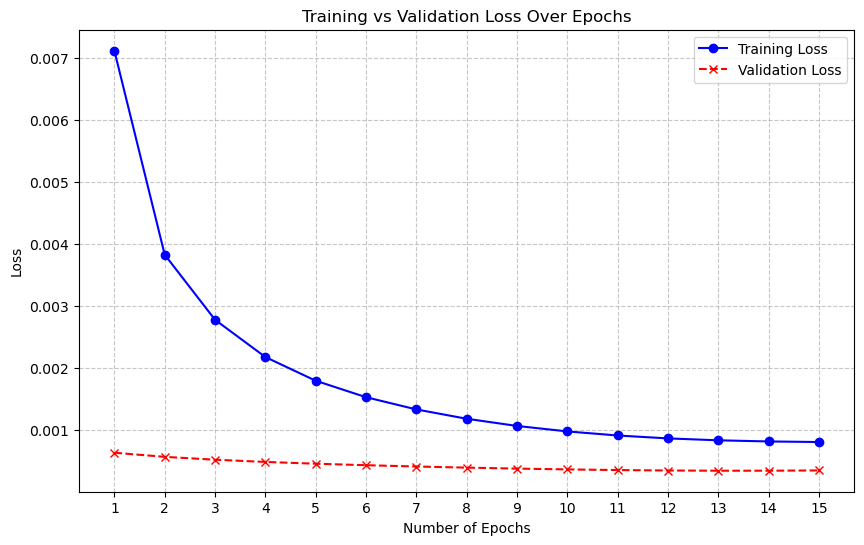



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.7 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.003396).  Saving model ...
Epoch 10/150, Training Loss: 0.005750, Validation Loss: 0.000701
Validation loss decreased (0.003396 --> 0.002702).  Saving model ...
Epoch 20/150, Training Loss: 0.003342, Validation Loss: 0.000596
Validation loss decreased (0.002702 --> 0.002412).  Saving model ...
Epoch 30/150, Training Loss: 0.002590, Validation Loss: 0.000539
Validation loss decreased (0.002412 --> 0.002209).  Saving model ...
Epoch 40/150, Training Loss: 0.002133, Validation Loss: 0.000498
Validation loss decreased (0.002209 --> 0.002047).  Saving model ...
Epoch 50/150, Training Loss: 0.001812, Val

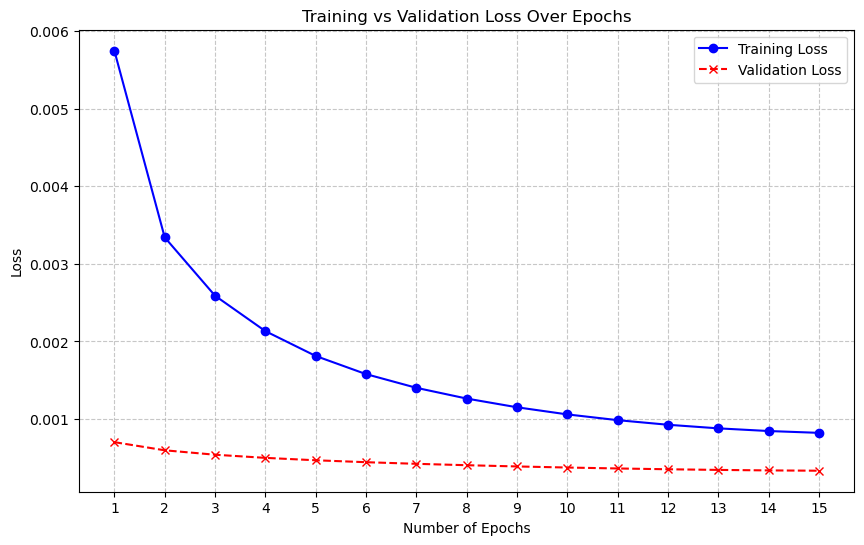



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.003793).  Saving model ...
Epoch 10/150, Training Loss: 0.006819, Validation Loss: 0.000773
Validation loss decreased (0.003793 --> 0.002951).  Saving model ...
Epoch 20/150, Training Loss: 0.003888, Validation Loss: 0.000652
Validation loss decreased (0.002951 --> 0.002611).  Saving model ...
Epoch 30/150, Training Loss: 0.002959, Validation Loss: 0.000580
Validation loss decreased (0.002611 --> 0.002384).  Saving model ...
Epoch 40/150, Training Loss: 0.002411, Validation Loss: 0.000532
Validation loss decreased (0.002384 --> 0.002215).  Saving model ...
Epoch 50/150, Training Loss: 0.002059, Val

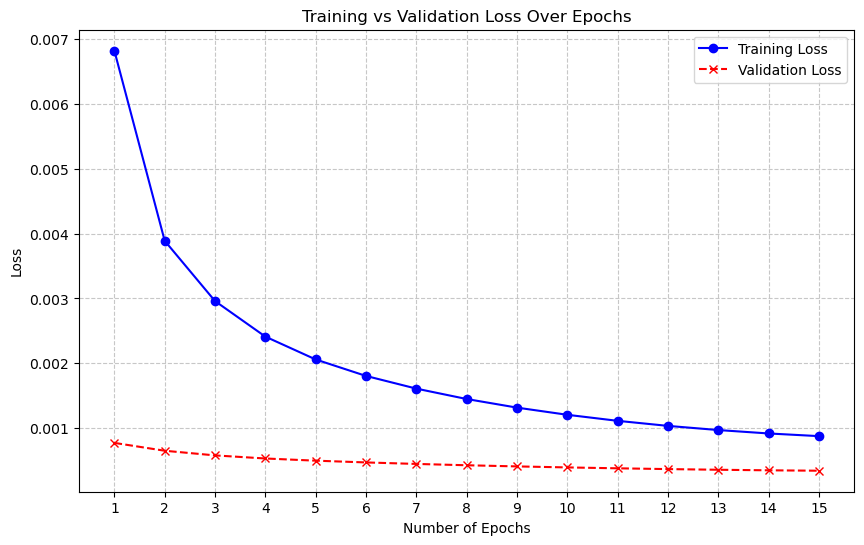



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.95 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.003650).  Saving model ...
Epoch 10/150, Training Loss: 0.006957, Validation Loss: 0.000636
Validation loss decreased (0.003650 --> 0.002809).  Saving model ...
Epoch 20/150, Training Loss: 0.003956, Validation Loss: 0.000571
Validation loss decreased (0.002809 --> 0.002482).  Saving model ...
Epoch 30/150, Training Loss: 0.002979, Validation Loss: 0.000528
Validation loss decreased (0.002482 --> 0.002266).  Saving model ...
Epoch 40/150, Training Loss: 0.002405, Validation Loss: 0.000497
Validation loss decreased (0.002266 --> 0.002097).  Saving model ...
Epoch 50/150, Training Loss: 0.002022, Va

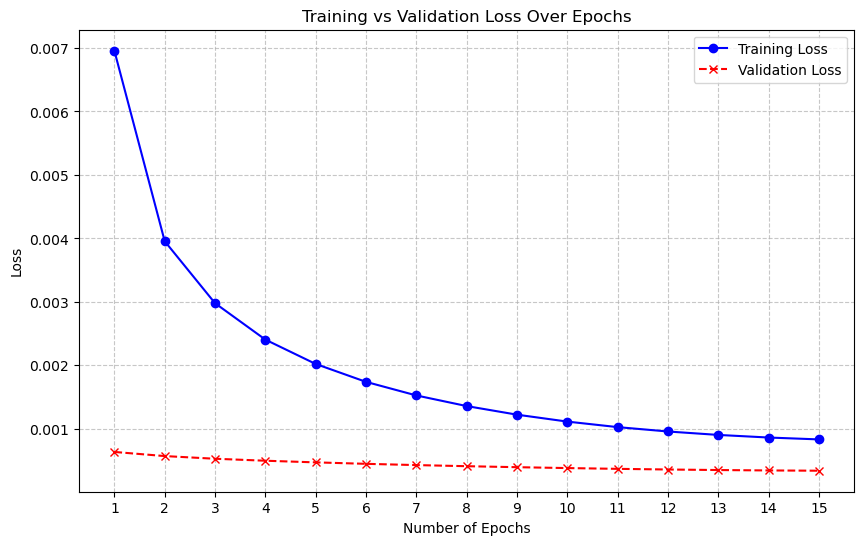



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.99 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.004070).  Saving model ...
Epoch 10/150, Training Loss: 0.008275, Validation Loss: 0.000702
Validation loss decreased (0.004070 --> 0.003027).  Saving model ...
Epoch 20/150, Training Loss: 0.004620, Validation Loss: 0.000600
Validation loss decreased (0.003027 --> 0.002649).  Saving model ...
Epoch 30/150, Training Loss: 0.003482, Validation Loss: 0.000552
Validation loss decreased (0.002649 --> 0.002399).  Saving model ...
Epoch 40/150, Training Loss: 0.002795, Validation Loss: 0.000517
Validation loss decreased (0.002399 --> 0.002212).  Saving model ...
Epoch 50/150, Training Loss: 0.002332, Va

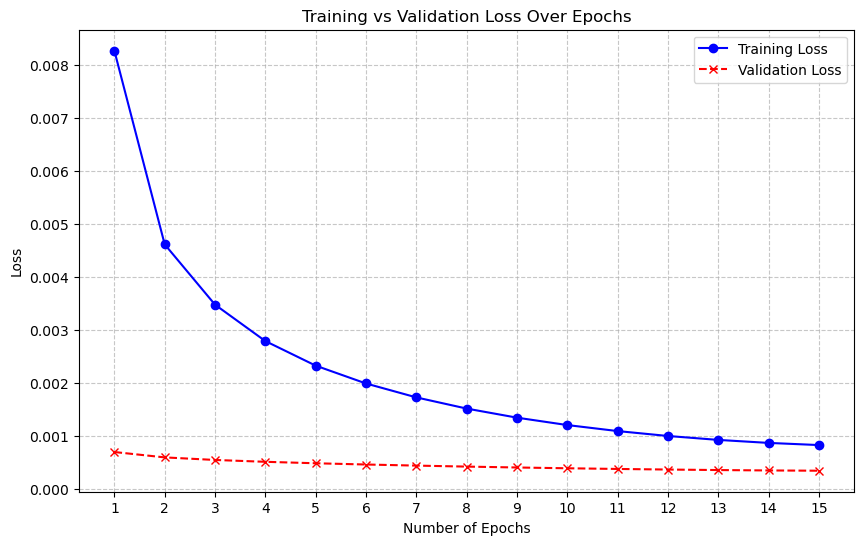



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  1 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.004544).  Saving model ...
Epoch 10/150, Training Loss: 0.009588, Validation Loss: 0.000841
Validation loss decreased (0.004544 --> 0.003153).  Saving model ...
Epoch 20/150, Training Loss: 0.004968, Validation Loss: 0.000642
Validation loss decreased (0.003153 --> 0.002683).  Saving model ...
Epoch 30/150, Training Loss: 0.003587, Validation Loss: 0.000562
Validation loss decreased (0.002683 --> 0.002398).  Saving model ...
Epoch 40/150, Training Loss: 0.002818, Validation Loss: 0.000516
Validation loss decreased (0.002398 --> 0.002192).  Saving model ...
Epoch 50/150, Training Loss: 0.002316, Valid

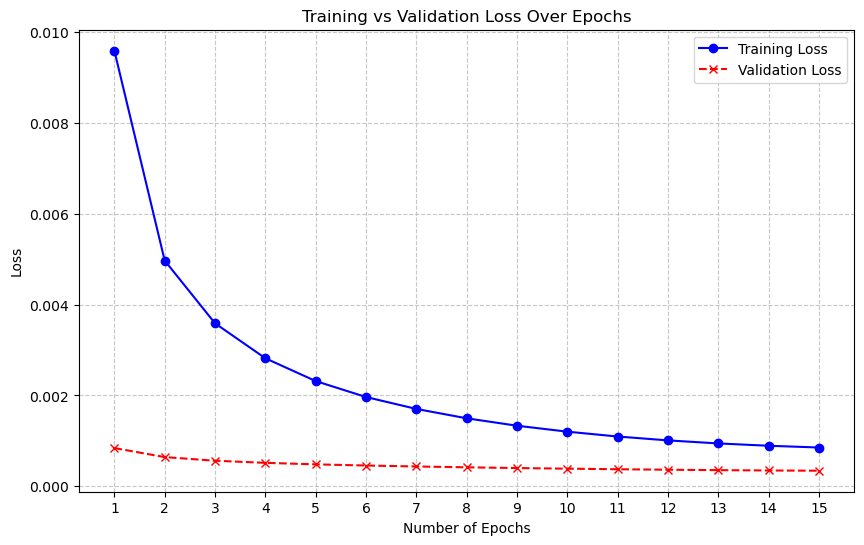



Best beta1:  0.45    Loss:  tensor(1.3563e-06, device='cuda:0', grad_fn=<MseLossBackward0>)
Second best beta1:  0.9    Loss:  tensor(1.3634e-06, device='cuda:0', grad_fn=<MseLossBackward0>)


In [15]:
skip_this_step = False

if not skip_this_step:
    #test various learning rates
    beta1_list = [0.45, 0.7, 0.9, 0.95, 0.99, 1]
    best_beta1 = [[np.inf, np.inf] , [np.inf, np.inf]] #record two pairs of [loss, learning rate] to tune learning rate later
    best_beta1_in_loop = np.inf
    repeated_loops_per_beta1 = 1
    bestRNN_b1_Setup = [rnnControlSetup,None]
    bestRNN_b1 = [rnnControl,None]
    bestRNN_in_loop = rnnControl
    #lr testing
    for b1 in beta1_list:
        print("\n\n-------------------------------------------------------------------------------")
        print("Learning rate: ", 0.001, "   Loop: ", repeated_loops_per_beta1)
        print(stock_name, "Time interval ", stock_interval, "min", "Time period: ", stock_period, 'months')
        print("Batch size: ", batch_size, "Number of workers: ", num_workers, "Epochs: ", epochs)
        print("Learning rate scheduler rate: ", lr_scheduler_rate)
        print("Beta1: ", b1, "Beta2: ", beta2)
        print("-------------------------------------------------------------------------------")
        rnnSetup = RNN_initializer(retrieve=False, name=stock_name, recomp=True, nval=1, ival=[5, "m"], pval=[7,"d"], sequence_len=sequence_len, 
                batch_size=batch_size, num_workers=num_workers, epochs=epochs, learning_rate=lr, 
                lr_scheduler_rate=lr_scheduler_rate, beta1=b1, beta2=beta2)
        for i in range(repeated_loops_per_beta1):
            rnn = rnnSetup.init_RNN()
            #returns
            training_loss_array = []
            validation_loss_array = []
            loss = rnnSetup.trainAndTest(rnn)
            if best_beta1_in_loop > loss:
                best_beta1_in_loop = loss
                bestRNN_in_loop = rnn
        #if found best lr, remove worst lr from list
        if best_beta1_in_loop < best_beta1[0][0]:
            best_beta1[1] = best_beta1[0]
            best_beta1[0] = [best_beta1_in_loop, b1]
            bestRNN_b1[1] = bestRNN_b1[0]
            bestRNN_b1[0] = bestRNN_in_loop
            bestRNN_b1_Setup[1] =  bestRNN_b1_Setup[0] 
            bestRNN_b1_Setup[0] =  rnnSetup
            #if 
        elif best_beta1_in_loop < best_beta1[1][0]:
            best_beta1[1] = [best_beta1_in_loop, b1]
            bestRNN_b1[1] = bestRNN_in_loop
            bestRNN_b1_Setup[1] =  rnnSetup
        best_beta1_in_loop = np.inf

        plot_loss(training_loss_array, validation_loss_array, epochs)

    print("\n\nBest beta1: ", best_beta1[0][1], "   Loss: ", best_beta1[0][0])
    print("Second best beta1: ", best_beta1[1][1], "   Loss: ", best_beta1[1][0])



# Test beta2 value effect



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.5
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.005051).  Saving model ...
Epoch 10/150, Training Loss: 0.010660, Validation Loss: 0.001156
Validation loss decreased (0.005051 --> 0.003270).  Saving model ...
Epoch 20/150, Training Loss: 0.005111, Validation Loss: 0.000714
Validation loss decreased (0.003270 --> 0.002713).  Saving model ...
Epoch 30/150, Training Loss: 0.003511, Validation Loss: 0.000596
Validation loss decreased (0.002713 --> 0.002391).  Saving model ...
Epoch 40/150, Training Loss: 0.002670, Validation Loss: 0.000531
Validation loss decreased (0.002391 --> 0.002164).  Saving model ...
Epoch 50/150, Training Loss: 0.002143, Valid

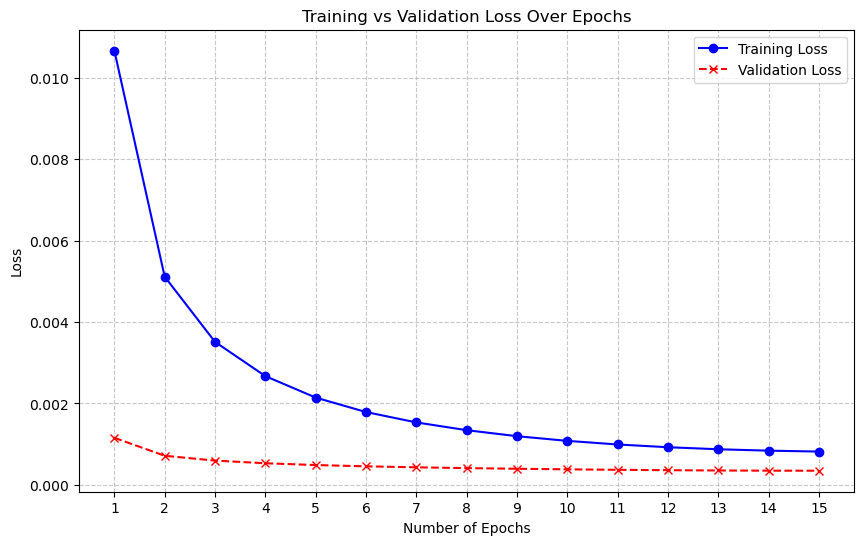



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.9
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.004777).  Saving model ...
Epoch 10/150, Training Loss: 0.010692, Validation Loss: 0.000729
Validation loss decreased (0.004777 --> 0.003363).  Saving model ...
Epoch 20/150, Training Loss: 0.005884, Validation Loss: 0.000629
Validation loss decreased (0.003363 --> 0.002851).  Saving model ...
Epoch 30/150, Training Loss: 0.004257, Validation Loss: 0.000567
Validation loss decreased (0.002851 --> 0.002536).  Saving model ...
Epoch 40/150, Training Loss: 0.003326, Validation Loss: 0.000525
Validation loss decreased (0.002536 --> 0.002308).  Saving model ...
Epoch 50/150, Training Loss: 0.002711, Valid

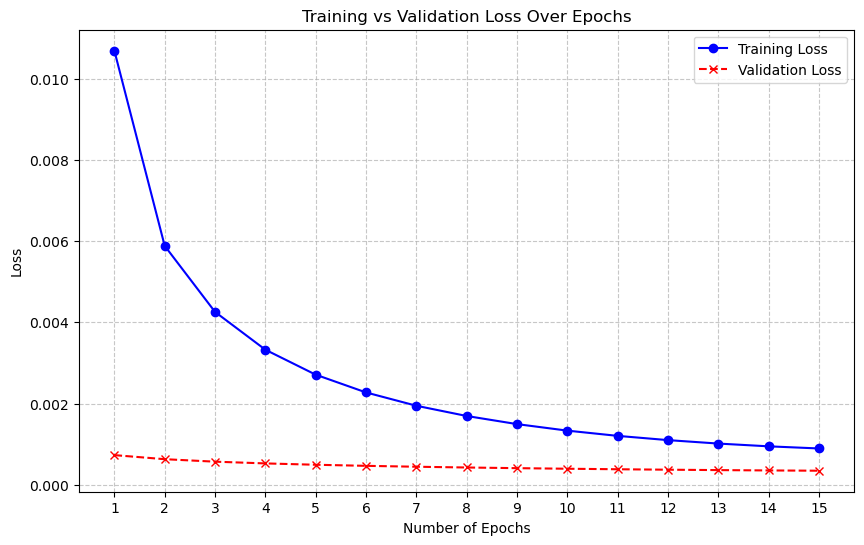



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.99
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.003602).  Saving model ...
Epoch 10/150, Training Loss: 0.006777, Validation Loss: 0.000647
Validation loss decreased (0.003602 --> 0.002696).  Saving model ...
Epoch 20/150, Training Loss: 0.003806, Validation Loss: 0.000564
Validation loss decreased (0.002696 --> 0.002358).  Saving model ...
Epoch 30/150, Training Loss: 0.002852, Validation Loss: 0.000517
Validation loss decreased (0.002358 --> 0.002130).  Saving model ...
Epoch 40/150, Training Loss: 0.002269, Validation Loss: 0.000483
Validation loss decreased (0.002130 --> 0.001955).  Saving model ...
Epoch 50/150, Training Loss: 0.001877, Vali

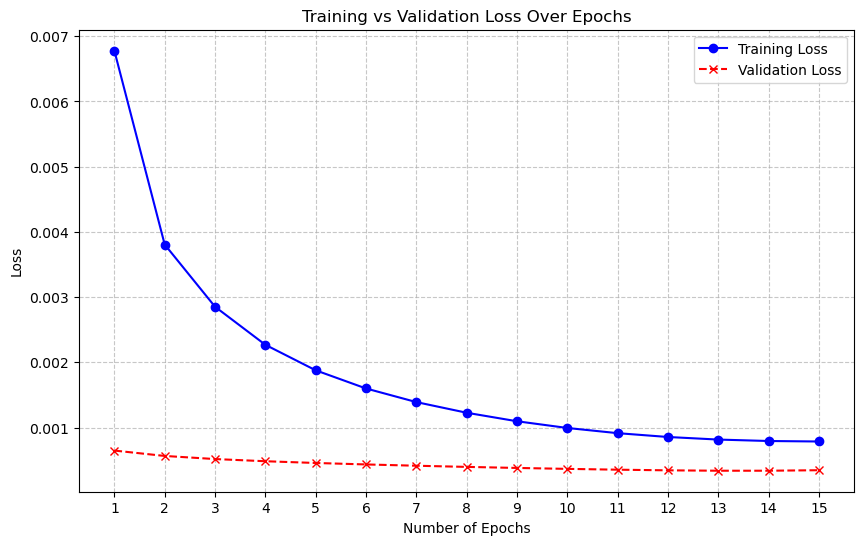



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.004305).  Saving model ...
Epoch 10/150, Training Loss: 0.008705, Validation Loss: 0.000879
Validation loss decreased (0.004305 --> 0.003083).  Saving model ...
Epoch 20/150, Training Loss: 0.004674, Validation Loss: 0.000666
Validation loss decreased (0.003083 --> 0.002611).  Saving model ...
Epoch 30/150, Training Loss: 0.003325, Validation Loss: 0.000571
Validation loss decreased (0.002611 --> 0.002312).  Saving model ...
Epoch 40/150, Training Loss: 0.002542, Validation Loss: 0.000514
Validation loss decreased (0.002312 --> 0.002097).  Saving model ...
Epoch 50/150, Training Loss: 0.002045, Val

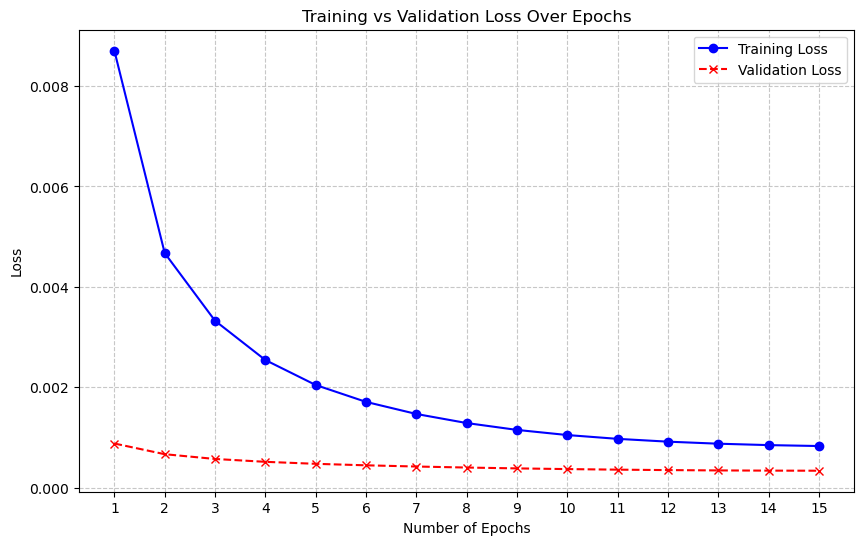



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.9999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.004708).  Saving model ...
Epoch 10/150, Training Loss: 0.009986, Validation Loss: 0.000918
Validation loss decreased (0.004708 --> 0.003219).  Saving model ...
Epoch 20/150, Training Loss: 0.005269, Validation Loss: 0.000639
Validation loss decreased (0.003219 --> 0.002702).  Saving model ...
Epoch 30/150, Training Loss: 0.003774, Validation Loss: 0.000556
Validation loss decreased (0.002702 --> 0.002380).  Saving model ...
Epoch 40/150, Training Loss: 0.002906, Validation Loss: 0.000504
Validation loss decreased (0.002380 --> 0.002150).  Saving model ...
Epoch 50/150, Training Loss: 0.002337, Va

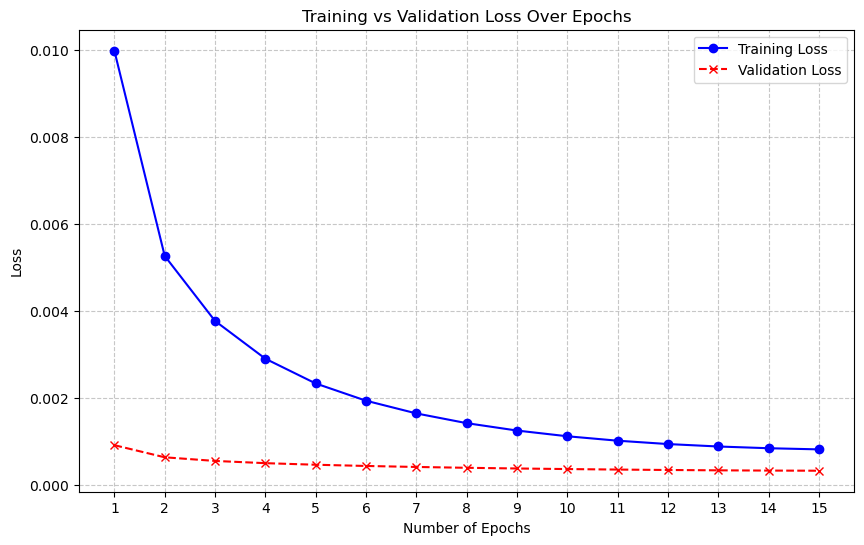



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  1
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.004349).  Saving model ...
Epoch 10/150, Training Loss: 0.008947, Validation Loss: 0.000794
Validation loss decreased (0.004349 --> 0.003132).  Saving model ...
Epoch 20/150, Training Loss: 0.004763, Validation Loss: 0.000649
Validation loss decreased (0.003132 --> 0.002673).  Saving model ...
Epoch 30/150, Training Loss: 0.003382, Validation Loss: 0.000573
Validation loss decreased (0.002673 --> 0.002391).  Saving model ...
Epoch 40/150, Training Loss: 0.002623, Validation Loss: 0.000525
Validation loss decreased (0.002391 --> 0.002188).  Saving model ...
Epoch 50/150, Training Loss: 0.002146, Validat

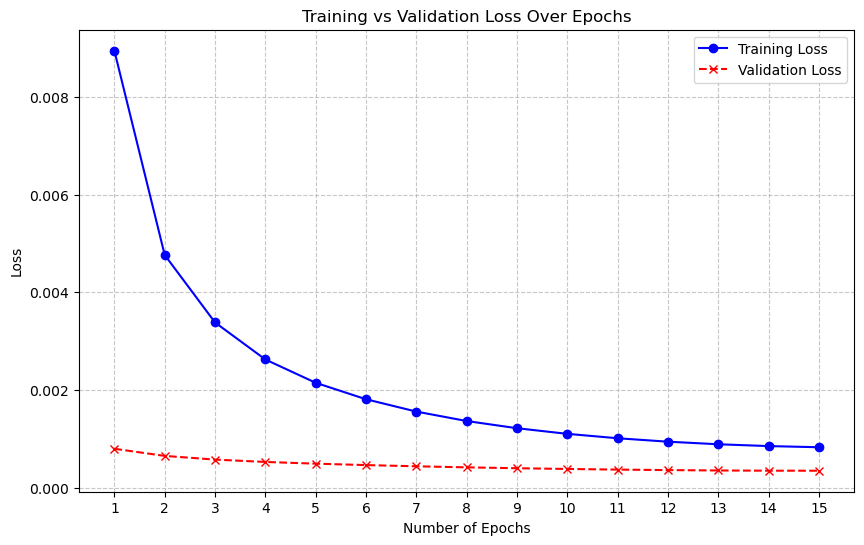



Best beta2:  0.99    Loss:  tensor(1.3826e-06, device='cuda:0', grad_fn=<MseLossBackward0>)
Second best beta2:  0.5    Loss:  tensor(1.4082e-06, device='cuda:0', grad_fn=<MseLossBackward0>)


In [16]:
skip_this_step = False
if not skip_this_step:
    #test various learning rates
    beta2_list = [0.5, 0.9, 0.99, 0.999, 0.9999, 1]
    best_beta2 = [[np.inf, np.inf] , [np.inf, np.inf]] #record two pairs of [loss, learning rate] to tune learning rate later
    best_beta2_in_loop = np.inf
    repeated_loops_per_beta2 = 1
    bestRNN_b2_Setup = [rnnControlSetup,None]
    bestRNN_b2 = [rnnControl,None]
    bestRNN_in_loop = rnnControl
    #lr testing
    for b2 in beta2_list:
        print("\n\n-------------------------------------------------------------------------------")
        print("Learning rate: ", 0.001, "   Loop: ", repeated_loops_per_beta2)
        print(stock_name, "Time interval ", stock_interval, "min", "Time period: ", stock_period, 'months')
        print("Batch size: ", batch_size, "Number of workers: ", num_workers, "Epochs: ", epochs)
        print("Learning rate scheduler rate: ", lr_scheduler_rate)
        print("Beta1: ", beta1, "Beta2: ", b2)
        print("-------------------------------------------------------------------------------")
        rnnSetup = RNN_initializer(retrieve=False, name=stock_name, recomp=True, nval=1, ival=[5, "m"], pval=[7,"d"], sequence_len=sequence_len,
                    batch_size=batch_size, num_workers=num_workers, epochs=epochs, learning_rate=lr, 
                    lr_scheduler_rate=lr_scheduler_rate, beta1=beta1, beta2=b2)
        for i in range(repeated_loops_per_beta2):
            rnn = rnnSetup.init_RNN()
            #returns
            training_loss_array = []
            validation_loss_array = []
            loss = rnnSetup.trainAndTest(rnn)
            if best_beta2_in_loop > loss:
                best_beta2_in_loop = loss
                bestRNN_in_loop = rnn
        #if found best lr, remove worst lr from list
        if best_beta2_in_loop < best_beta2[0][0]:
            best_beta2[1] = best_beta2[0]
            best_beta2[0] = [best_beta2_in_loop, b2]
            bestRNN_b2[1] = bestRNN_b2[0]
            bestRNN_b2[0] = bestRNN_in_loop
            bestRNN_b2_Setup[1] =  bestRNN_b2_Setup[0] 
            bestRNN_b2_Setup[0] =  rnnSetup
            #if 
        elif best_beta2_in_loop < best_beta2[1][0]:
            best_beta2[1] = [best_beta2_in_loop, b2]
            bestRNN_b2[1] = bestRNN_in_loop
            bestRNN_b2_Setup[1] =  rnnSetup
        best_beta2_in_loop = np.inf

        plot_loss(training_loss_array, validation_loss_array, epochs)

    print("\n\nBest beta2: ", best_beta2[0][1], "   Loss: ", best_beta2[0][0])
    print("Second best beta2: ", best_beta2[1][1], "   Loss: ", best_beta2[1][0])

# Test epochs



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  100
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.004261).  Saving model ...
Epoch 10/150, Training Loss: 0.008738, Validation Loss: 0.000776
Validation loss decreased (0.004261 --> 0.002977).  Saving model ...
Epoch 20/150, Training Loss: 0.004527, Validation Loss: 0.000599
Validation loss decreased (0.002977 --> 0.002507).  Saving model ...
Epoch 30/150, Training Loss: 0.003169, Validation Loss: 0.000527
Validation loss decreased (0.002507 --> 0.002219).  Saving model ...
Epoch 40/150, Training Loss: 0.002422, Validation Loss: 0.000483
Validation loss decreased (0.002219 --> 0.002009).  Saving model ...
Epoch 50/150, Training Loss: 0.001947, Val

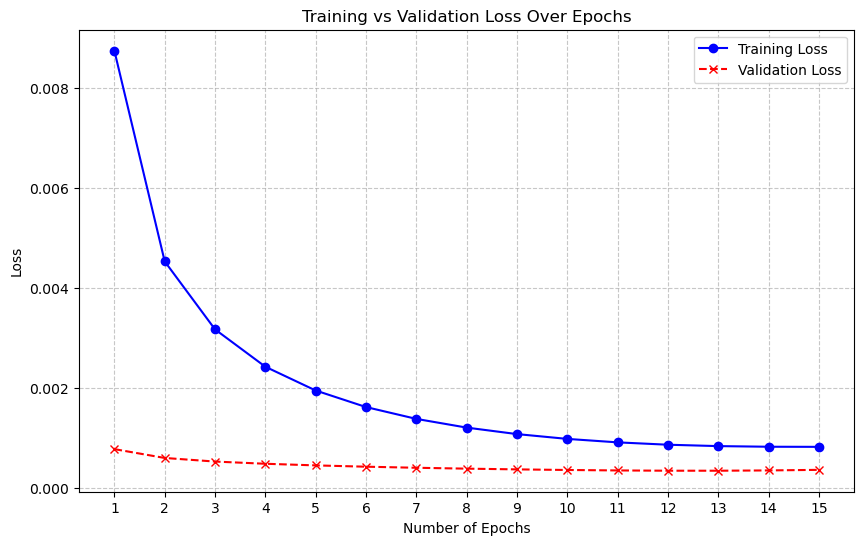



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.003150).  Saving model ...
Epoch 10/150, Training Loss: 0.005196, Validation Loss: 0.000608
Validation loss decreased (0.003150 --> 0.002593).  Saving model ...
Epoch 20/150, Training Loss: 0.003167, Validation Loss: 0.000558
Validation loss decreased (0.002593 --> 0.002327).  Saving model ...
Epoch 30/150, Training Loss: 0.002478, Validation Loss: 0.000513
Validation loss decreased (0.002327 --> 0.002132).  Saving model ...
Epoch 40/150, Training Loss: 0.002042, Validation Loss: 0.000480
Validation loss decreased (0.002132 --> 0.001973).  Saving model ...
Epoch 50/150, Training Loss: 0.001738, Val

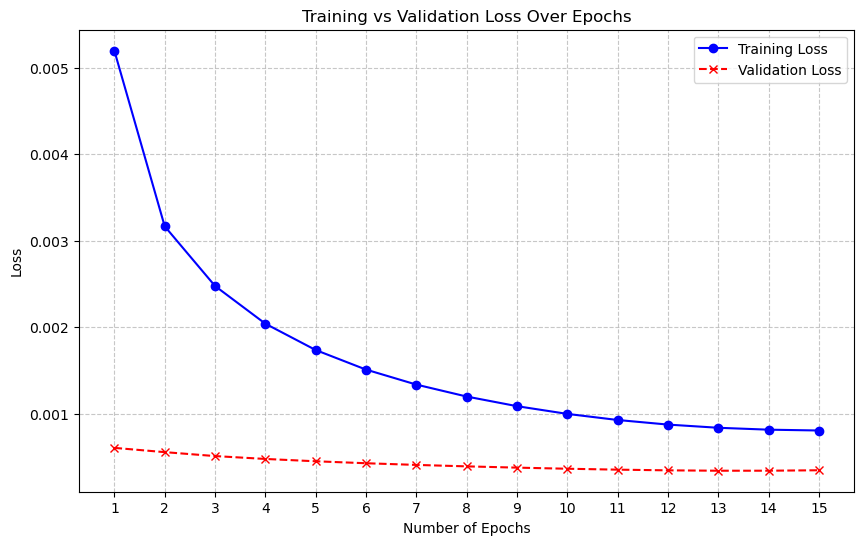



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  200
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.005879).  Saving model ...
Epoch 10/150, Training Loss: 0.014017, Validation Loss: 0.000815
Validation loss decreased (0.005879 --> 0.003649).  Saving model ...
Epoch 20/150, Training Loss: 0.007086, Validation Loss: 0.000605
Validation loss decreased (0.003649 --> 0.002912).  Saving model ...
Epoch 30/150, Training Loss: 0.004796, Validation Loss: 0.000543
Validation loss decreased (0.002912 --> 0.002515).  Saving model ...
Epoch 40/150, Training Loss: 0.003593, Validation Loss: 0.000507
Validation loss decreased (0.002515 --> 0.002256).  Saving model ...
Epoch 50/150, Training Loss: 0.002850, Val

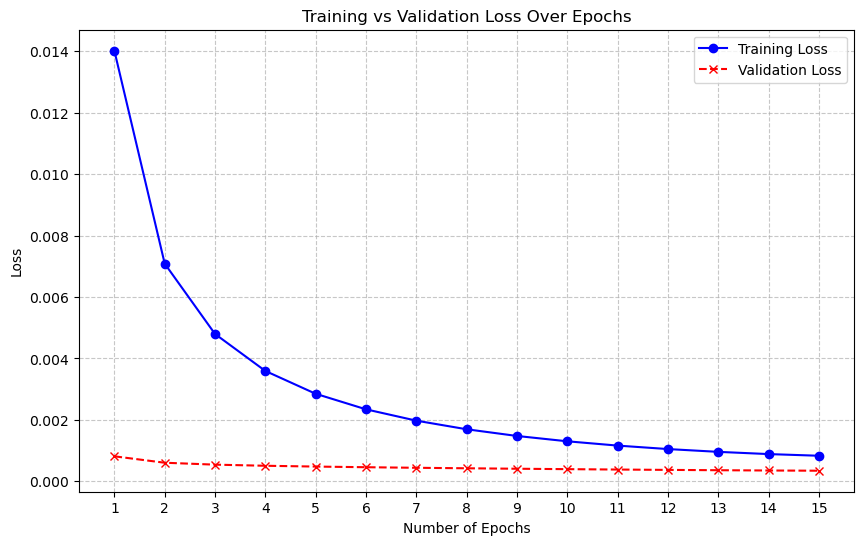



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  300
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.004924).  Saving model ...
Epoch 10/150, Training Loss: 0.011051, Validation Loss: 0.000718
Validation loss decreased (0.004924 --> 0.003285).  Saving model ...
Epoch 20/150, Training Loss: 0.005563, Validation Loss: 0.000609
Validation loss decreased (0.003285 --> 0.002737).  Saving model ...
Epoch 30/150, Training Loss: 0.003843, Validation Loss: 0.000554
Validation loss decreased (0.002737 --> 0.002411).  Saving model ...
Epoch 40/150, Training Loss: 0.002896, Validation Loss: 0.000511
Validation loss decreased (0.002411 --> 0.002181).  Saving model ...
Epoch 50/150, Training Loss: 0.002296, Val

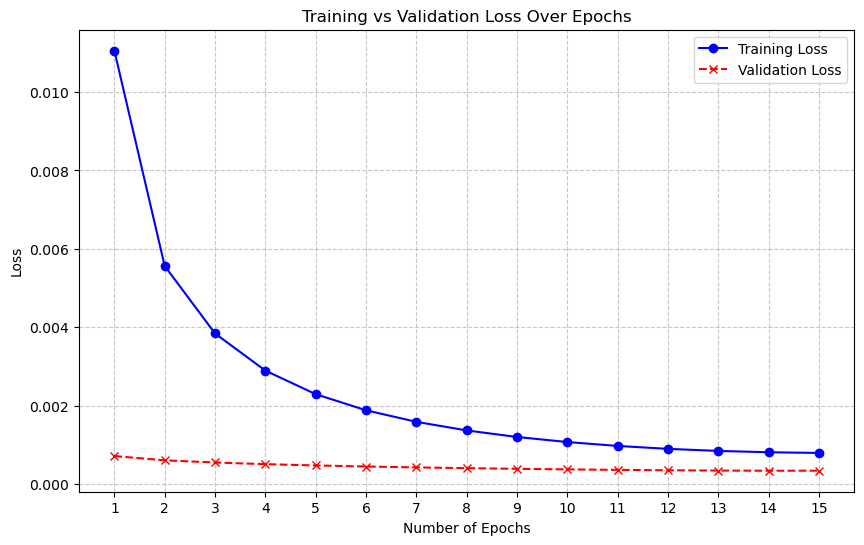



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  400
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.004877).  Saving model ...
Epoch 10/150, Training Loss: 0.009589, Validation Loss: 0.001393
Validation loss decreased (0.004877 --> 0.003357).  Saving model ...
Epoch 20/150, Training Loss: 0.005171, Validation Loss: 0.000860
Validation loss decreased (0.003357 --> 0.002826).  Saving model ...
Epoch 30/150, Training Loss: 0.003816, Validation Loss: 0.000679
Validation loss decreased (0.002826 --> 0.002507).  Saving model ...
Epoch 40/150, Training Loss: 0.003040, Validation Loss: 0.000586
Validation loss decreased (0.002507 --> 0.002279).  Saving model ...
Epoch 50/150, Training Loss: 0.002521, Val

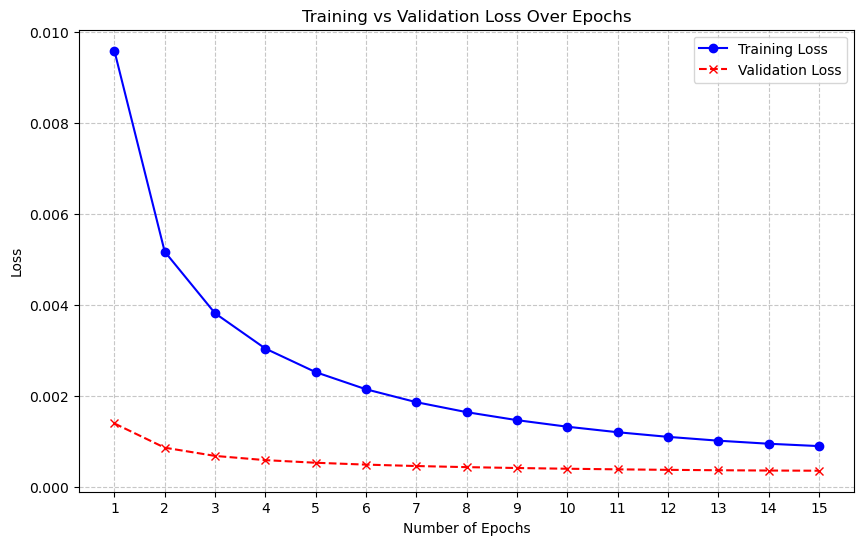



Best learning rate:  300    Loss:  tensor(1.4225e-06, device='cuda:0', grad_fn=<MseLossBackward0>)
Second best learning rate:  100    Loss:  tensor(1.4326e-06, device='cuda:0', grad_fn=<MseLossBackward0>)


In [17]:
skip_this_step = False

if not skip_this_step:
    #test various learning rates
    epoch_list = [100, 150, 200, 300, 400] #revert later for hyperparameter testing, the first few values are not good current set of hyperparameters
    #learning_rate_list = [0.0005, 0.0001, 0.00005, 0.00001]
    best_epoch = [[np.inf, np.inf] , [np.inf, np.inf]] #record two pairs of [loss, learning rate] to tune learning rate later
    best_epoch_in_loop = np.inf
    repeated_loops_per_epoch = 1
    bestRNN_ep_Setup = [rnnControlSetup,None]
    bestRNN_ep = [rnnControl,None]
    bestRNN_in_loop = rnnControl
    #lr testing
    for ep in epoch_list:
        print("\n\n-------------------------------------------------------------------------------")
        print("Learning rate: ", 0.001, "   Loop: ", repeated_loops_per_epoch)
        print(stock_name, "Time interval ", stock_interval, "min", "Time period: ", stock_period, 'months')
        print("Batch size: ", batch_size, "Number of workers: ", num_workers, "Epochs: ", ep)
        print("Learning rate scheduler rate: ", lr_scheduler_rate)
        print("Beta1: ", beta1, "Beta2: ", beta2)
        print("-------------------------------------------------------------------------------")
        rnnSetup = RNN_initializer(retrieve=False, name=stock_name, recomp=True, nval=1, ival=[5, "m"], pval=[7,"d"], sequence_len=sequence_len,
                    batch_size=batch_size, num_workers=num_workers, epochs=ep, learning_rate=lr, 
                    lr_scheduler_rate=lr_scheduler_rate, beta1=beta1, beta2=beta2)
        for i in range(repeated_loops_per_epoch):
            rnn = rnnSetup.init_RNN()
            #returns
            training_loss_array = []
            validation_loss_array = []
            loss = rnnSetup.trainAndTest(rnn)
            if best_epoch_in_loop > loss:
                best_epoch_in_loop = loss
                bestRNN_in_loop = rnn
        #if found best lr, remove worst lr from list
        if best_epoch_in_loop < best_epoch[0][0]:
            best_epoch[1] = best_epoch[0]
            best_epoch[0] = [best_epoch_in_loop, ep]
            bestRNN_ep[1] = bestRNN_ep[0]
            bestRNN_ep[0] = bestRNN_in_loop
            bestRNN_ep_Setup[1] =  bestRNN_ep_Setup[0] 
            bestRNN_ep_Setup[0] =  rnnSetup
            #if 
        elif best_epoch_in_loop < best_epoch[1][0]:
            best_epoch[1] = [best_epoch_in_loop, ep]
            bestRNN_ep[1] = bestRNN_in_loop
            bestRNN_ep_Setup[1] =  rnnSetup
        best_epoch_in_loop = np.inf

        plot_loss(training_loss_array, validation_loss_array, epochs)

    print("\n\nBest learning rate: ", best_epoch[0][1], "   Loss: ", best_epoch[0][0])
    print("Second best learning rate: ", best_epoch[1][1], "   Loss: ", best_epoch[1][0])


# test batch_size

# test sequence_size



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
Sequence size:  2
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.001991).  Saving model ...
Epoch 10/150, Training Loss: 0.003002, Validation Loss: 0.000167
Validation loss decreased (0.001991 --> 0.001696).  Saving model ...
Epoch 20/150, Training Loss: 0.001674, Validation Loss: 0.000260
Validation loss decreased (0.001696 --> 0.001636).  Saving model ...
Epoch 30/150, Training Loss: 0.001542, Validation Loss: 0.000238
Validation loss decreased (0.001636 --> 0.001586).  Saving model ...
Epoch 40/150, Training Loss: 0.001442, Validation Loss: 0.000221
Validation loss decreased (0.001586 --> 0.001543).  Saving model ...
Epoch 50/150, Training L

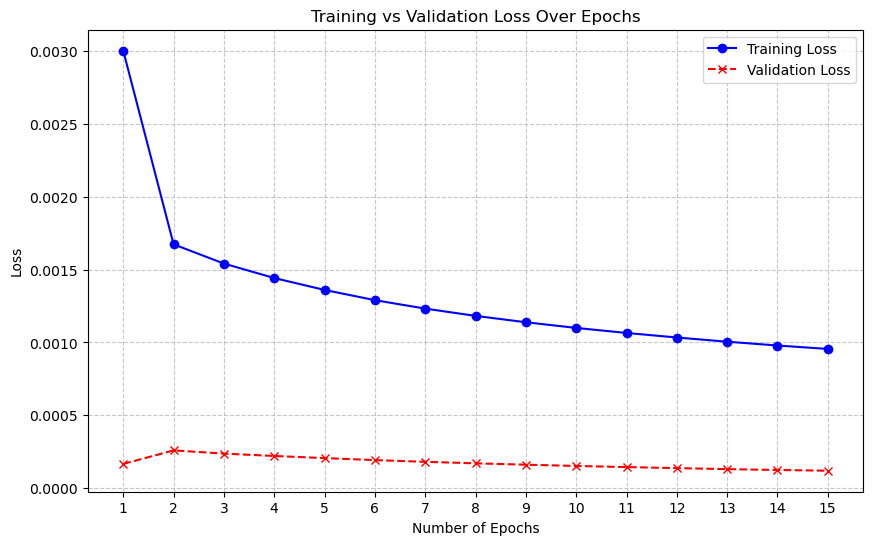



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
Sequence size:  4
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.004520).  Saving model ...
Epoch 10/150, Training Loss: 0.009538, Validation Loss: 0.000912
Validation loss decreased (0.004520 --> 0.003211).  Saving model ...
Epoch 20/150, Training Loss: 0.005300, Validation Loss: 0.000668
Validation loss decreased (0.003211 --> 0.002732).  Saving model ...
Epoch 30/150, Training Loss: 0.003904, Validation Loss: 0.000577
Validation loss decreased (0.002732 --> 0.002428).  Saving model ...
Epoch 40/150, Training Loss: 0.003073, Validation Loss: 0.000521
Validation loss decreased (0.002428 --> 0.002205).  Saving model ...
Epoch 50/150, Training L

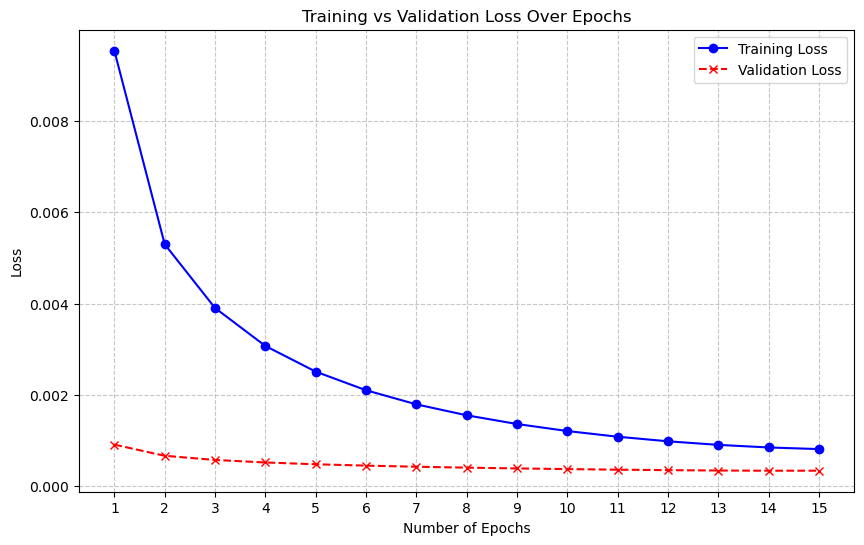



-------------------------------------------------------------------------------
Learning rate:  0.001    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
Sequence size:  6
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.006718).  Saving model ...
Epoch 10/150, Training Loss: 0.017048, Validation Loss: 0.000718
Validation loss decreased (0.006718 --> 0.003999).  Saving model ...
Epoch 20/150, Training Loss: 0.007787, Validation Loss: 0.000584
Validation loss decreased (0.003999 --> 0.002993).  Saving model ...
Epoch 30/150, Training Loss: 0.004513, Validation Loss: 0.000475
Validation loss decreased (0.002993 --> 0.002430).  Saving model ...
Epoch 40/150, Training Loss: 0.002903, Validation Loss: 0.000407
Validation loss decreased (0.002430 --> 0.002054).  Saving model ...
Epoch 50/150, Training L

NameError: name 'epoch' is not defined

In [18]:
skip_this_step = False
#NOTE this is not working, and will not work properly unless we optimize the RNN_initializer
if not skip_this_step:
    #test various learning rates
    seq_list = [2, 4, 6, 8, 10] #revert later for hyperparameter testing, the first few values are not good current set of hyperparameters
    #learning_rate_list = [0.0005, 0.0001, 0.00005, 0.00001]
    best_seq = [[np.inf, np.inf] , [np.inf, np.inf]] #record two pairs of [loss, learning rate] to tune learning rate later
    best_seq_in_loop = np.inf
    repeated_loops_per_seq = 1
    bestRNN_seq_Setup = [rnnControlSetup,None]
    bestRNN_seq = [rnnControl,None]
    bestRNN_in_loop = rnnControl
    #lr testing
    for seq in seq_list:
        print("\n\n-------------------------------------------------------------------------------")
        print("Learning rate: ", 0.001, "   Loop: ", repeated_loops_per_epoch)
        print(stock_name, "Time interval ", stock_interval, "min", "Time period: ", stock_period, 'months')
        print("Batch size: ", batch_size, "Number of workers: ", num_workers, "Epochs: ", epochs)
        print("Learning rate scheduler rate: ", lr_scheduler_rate)
        print("Beta1: ", beta1, "Beta2: ", beta2)
        print("Sequence size: ", seq)
        print("-------------------------------------------------------------------------------")
        rnnSetup = RNN_initializer(retrieve=False, name=stock_name, recomp=True, nval=1, ival=[5, "m"], pval=[7,"d"], 
                    batch_size=batch_size, sequence_len=seq, num_workers=num_workers, epochs=epochs, learning_rate=lr, 
                    lr_scheduler_rate=lr_scheduler_rate, beta1=beta1, beta2=beta2)
        for i in range(repeated_loops_per_seq):
            rnn = rnnSetup.init_RNN()
            #returns
            training_loss_array = []
            validation_loss_array = []
            loss = rnnSetup.trainAndTest(rnn)
            if best_epoch_in_loop > loss:
                best_epoch_in_loop = loss
                bestRNN_in_loop = rnn
        #if found best lr, remove worst lr from list
        if best_seq_in_loop < best_seq[0][0]:
            best_seq[1] = best_seq[0]
            best_seq[0] = [best_seq_in_loop, lr]
            bestRNN_seq[1] = bestRNN_seq[0]
            bestRNN_seq[0] = bestRNN_in_loop
            bestRNN_seq_Setup[1] =  bestRNN_seq_Setup[0] 
            bestRNN_seq_Setup[0] =  rnnSetup
            #if 
        elif best_epoch_in_loop < best_epoch[1][0]:
            best_seq[1] = [best_seq_in_loop, epoch]
            bestRNN_seq[1] = bestRNN_in_loop
            bestRNN_seq_Setup[1] =  rnnSetup
        best_epoch_in_loop = np.inf

        plot_loss(training_loss_array, validation_loss_array, epochs)

    print("\n\nBest learning rate: ", best_epoch[0][1], "   Loss: ", best_epoch[0][0])
    print("Second best learning rate: ", best_epoch[1][1], "   Loss: ", best_epoch[1][0])


# test scheduler_rate

In [ ]:
skip_this_step = True
#NOTE this is not working, and will not work properly unless we optimize the RNN_initializer
if not skip_this_step:
    #test various learning rates
    seq_list = [2, 4, 6, 8, 10] #revert later for hyperparameter testing, the first few values are not good current set of hyperparameters
    #learning_rate_list = [0.0005, 0.0001, 0.00005, 0.00001]
    best_seq = [[np.inf, np.inf] , [np.inf, np.inf]] #record two pairs of [loss, learning rate] to tune learning rate later
    best_seq_in_loop = np.inf
    repeated_loops_per_seq = 1
    bestRNN_bs_Setup = [rnnControlSetup,None]
    bestRNN = [rnnControl,None]
    bestRNN_in_loop = rnnControl
    #lr testing
    for seq in seq_list:
        print("\n\n-------------------------------------------------------------------------------")
        print("Learning rate: ", 0.001, "   Loop: ", repeated_loops_per_epoch)
        print(stock_name, "Time interval ", stock_interval, "min", "Time period: ", stock_period, 'months')
        print("Batch size: ", batch_size, "Number of workers: ", num_workers, "Epochs: ", epochs)
        print("Learning rate scheduler rate: ", lr_scheduler_rate)
        print("Beta1: ", beta1, "Beta2: ", beta2)
        print("Sequence size: ", seq)
        print("-------------------------------------------------------------------------------")
        rnnSetup = RNN_initializer(retrieve=False, name=stock_name, recomp=True, nval=1, ival=[5, "m"], pval=[7,"d"], 
                    batch_size=batch_size, sequence_len=seq, num_workers=num_workers, epochs=epochs, learning_rate=lr, 
                    lr_scheduler_rate=lr_scheduler_rate, beta1=beta1, beta2=beta2)
        for i in range(repeated_loops_per_seq):
            rnn = rnnSetup.init_RNN()
            #returns
            training_loss_array = []
            validation_loss_array = []
            loss = rnnSetup.trainAndTest(rnn)
            if best_epoch_in_loop > loss:
                best_epoch_in_loop = loss
                bestRNN_in_loop = rnn
        #if found best lr, remove worst lr from list
        if best_epoch_in_loop < best_epoch[0][0]:
            best_epoch[1] = best_epoch[0]
            best_epoch[0] = [best_epoch_in_loop, lr]
            bestRNN[1] = bestRNN[0]
            bestRNN[0] = bestRNN_in_loop
            bestRNN_bs_Setup[1] =  bestRNN_bs_Setup[0] 
            bestRNN_bs_Setup[0] =  rnnSetup
            #if 
        elif best_epoch_in_loop < best_epoch[1][0]:
            best_epoch[1] = [best_seq_in_loop, epoch]
            bestRNN[1] = bestRNN_in_loop
            bestRNN_bs_Setup[1] =  rnnSetup
        best_epoch_in_loop = np.inf

        plot_loss(training_loss_array, validation_loss_array, epochs)

    print("\n\nBest learning rate: ", best_epoch[0][1], "   Loss: ", best_epoch[0][0])
    print("Second best learning rate: ", best_epoch[1][1], "   Loss: ", best_epoch[1][0])


# Discover the optimal learning rate



-------------------------------------------------------------------------------
Learning rate:  1e-05    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.003766).  Saving model ...
Epoch 10/150, Training Loss: 0.007247, Validation Loss: 0.000665
Validation loss decreased (0.003766 --> 0.002824).  Saving model ...
Epoch 20/150, Training Loss: 0.004002, Validation Loss: 0.000573
Validation loss decreased (0.002824 --> 0.002460).  Saving model ...
Epoch 30/150, Training Loss: 0.002961, Validation Loss: 0.000520
Validation loss decreased (0.002460 --> 0.002230).  Saving model ...
Epoch 40/150, Training Loss: 0.002385, Validation Loss: 0.000485
Validation loss decreased (0.002230 --> 0.002061).  Saving model ...
Epoch 50/150, Training Loss: 0.002016, Val

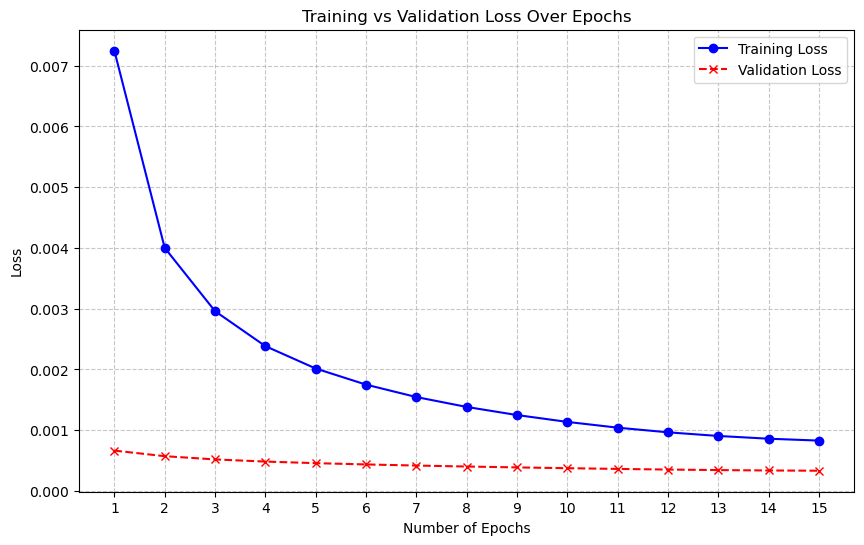



-------------------------------------------------------------------------------
Learning rate:  0.00010899999999999999    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.007641).  Saving model ...
Epoch 10/150, Training Loss: 0.007319, Validation Loss: 0.005486
Validation loss decreased (0.007641 --> 0.006765).  Saving model ...
Epoch 20/150, Training Loss: 0.013080, Validation Loss: 0.001380
Validation loss decreased (0.006765 --> 0.003413).  Saving model ...
Epoch 30/150, Training Loss: 0.007267, Validation Loss: 0.000734
Validation loss decreased (0.003413 --> 0.002436).  Saving model ...
Epoch 40/150, Training Loss: 0.004590, Validation Loss: 0.000573
Validation loss decreased (0.002436 --> 0.002009).  Saving model ...
Epoch 50/150, Training Lo

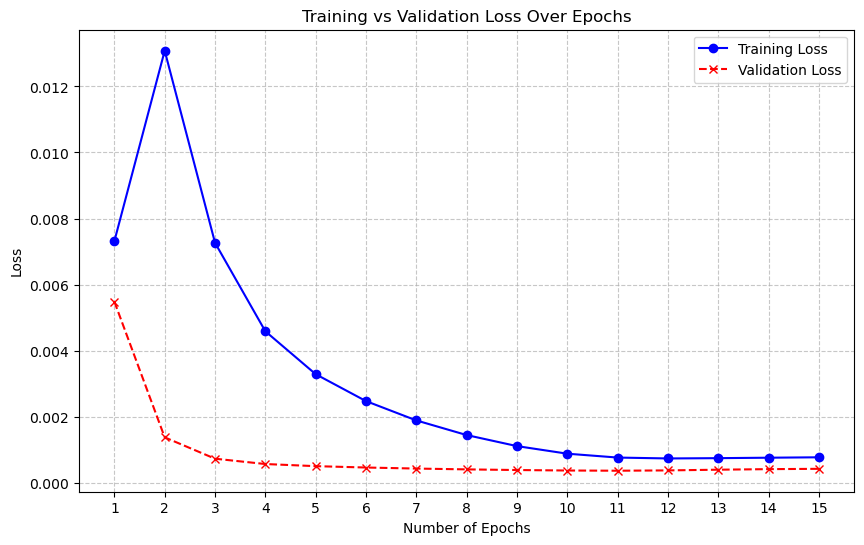



-------------------------------------------------------------------------------
Learning rate:  0.000208    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.038675).  Saving model ...
Epoch 10/150, Training Loss: 0.036034, Validation Loss: 0.040943
Validation loss decreased (0.038675 --> 0.016754).  Saving model ...
Epoch 20/150, Training Loss: 0.027506, Validation Loss: 0.002342
Validation loss decreased (0.016754 --> 0.005501).  Saving model ...
Epoch 30/150, Training Loss: 0.011137, Validation Loss: 0.001601
Validation loss decreased (0.005501 --> 0.002723).  Saving model ...
Epoch 40/150, Training Loss: 0.004920, Validation Loss: 0.000958
Validation loss decreased (0.002723 --> 0.001888).  Saving model ...
Epoch 50/150, Training Loss: 0.002670, 

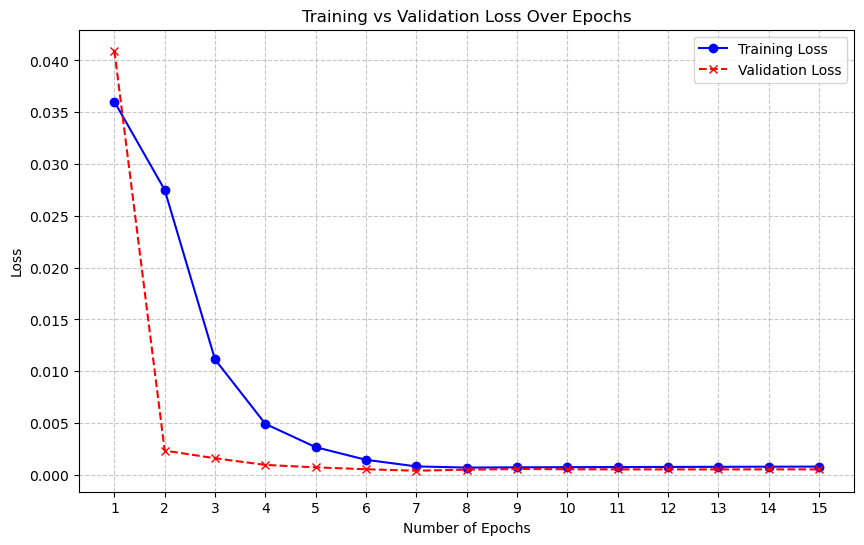



-------------------------------------------------------------------------------
Learning rate:  0.000307    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.265237).  Saving model ...
Epoch 10/150, Training Loss: 0.187479, Validation Loss: 0.297637
Validation loss decreased (0.265237 --> 0.022042).  Saving model ...
Epoch 20/150, Training Loss: 0.054581, Validation Loss: 0.000893
Validation loss decreased (0.022042 --> 0.003976).  Saving model ...
Epoch 30/150, Training Loss: 0.010600, Validation Loss: 0.000593
Validation loss decreased (0.003976 --> 0.001438).  Saving model ...
Epoch 40/150, Training Loss: 0.001537, Validation Loss: 0.000476
Validation loss decreased (0.001438 --> 0.001104).  Saving model ...
Epoch 50/150, Training Loss: 0.000672, 

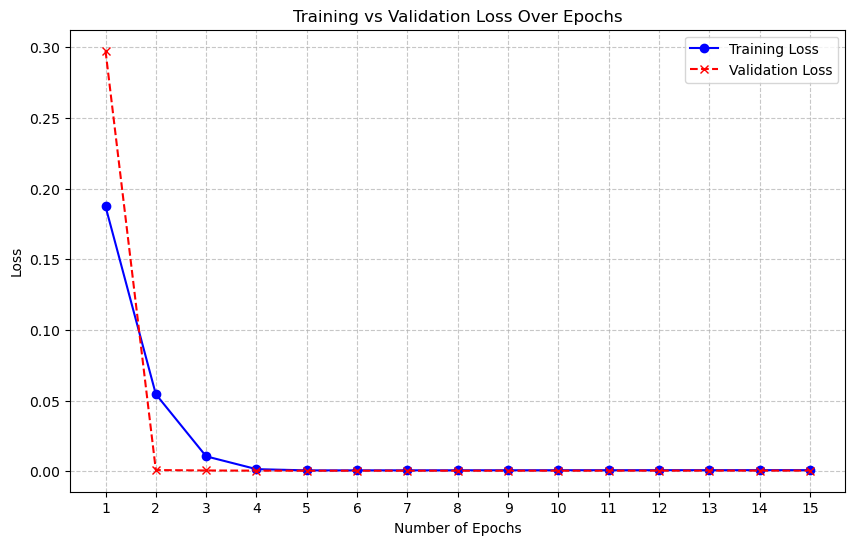



-------------------------------------------------------------------------------
Learning rate:  0.000406    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.356497).  Saving model ...
Epoch 10/150, Training Loss: 0.154212, Validation Loss: 0.544852
Validation loss decreased (0.356497 --> 0.026487).  Saving model ...
Epoch 20/150, Training Loss: 0.065697, Validation Loss: 0.000968
Validation loss decreased (0.026487 --> 0.003016).  Saving model ...
Epoch 30/150, Training Loss: 0.007805, Validation Loss: 0.000543
Validation loss decreased (0.003016 --> 0.001140).  Saving model ...
Epoch 40/150, Training Loss: 0.000641, Validation Loss: 0.000432
Validation loss decreased (0.001140 --> 0.001076).  Saving model ...
Epoch 50/150, Training Loss: 0.000668, 

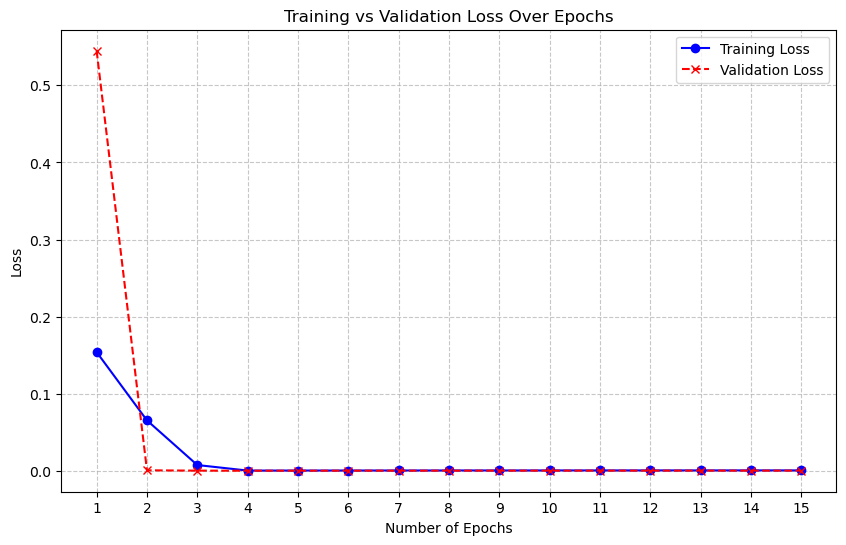



-------------------------------------------------------------------------------
Learning rate:  0.000505    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.824694).  Saving model ...
Epoch 10/150, Training Loss: 0.137967, Validation Loss: 1.524088
Validation loss decreased (0.824694 --> 0.031196).  Saving model ...
Epoch 20/150, Training Loss: 0.102637, Validation Loss: 0.000996
Validation loss decreased (0.031196 --> 0.001736).  Saving model ...
Epoch 30/150, Training Loss: 0.000497, Validation Loss: 0.000349
Epoch 40/150, Training Loss: 0.000606, Validation Loss: 0.000704
Epoch 50/150, Training Loss: 0.000720, Validation Loss: 0.001150
Epoch 60/150, Training Loss: 0.000788, Validation Loss: 0.001287
Epoch 70/150, Training Loss: 0.000856, Validati

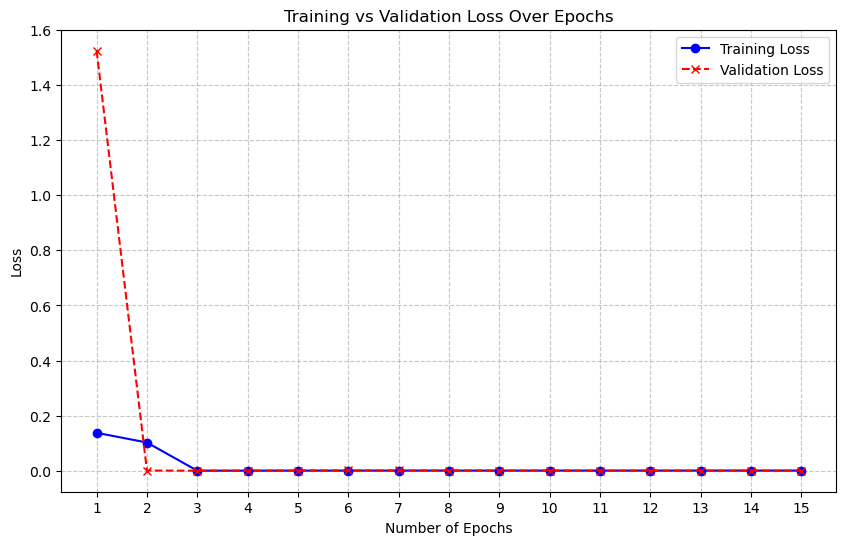



-------------------------------------------------------------------------------
Learning rate:  0.0006039999999999999    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.147266).  Saving model ...
Epoch 10/150, Training Loss: 0.093339, Validation Loss: 0.036943
Validation loss decreased (0.147266 --> 0.102955).  Saving model ...
Epoch 20/150, Training Loss: 0.000469, Validation Loss: 0.065893
Validation loss decreased (0.102955 --> 0.002966).  Saving model ...
Epoch 30/150, Training Loss: 0.000391, Validation Loss: 0.000690
Validation loss decreased (0.002966 --> 0.002962).  Saving model ...
Epoch 40/150, Training Loss: 0.000752, Validation Loss: 0.000713
Epoch 50/150, Training Loss: 0.001940, Validation Loss: 0.000963
Epoch 60/150, Training Loss: 0

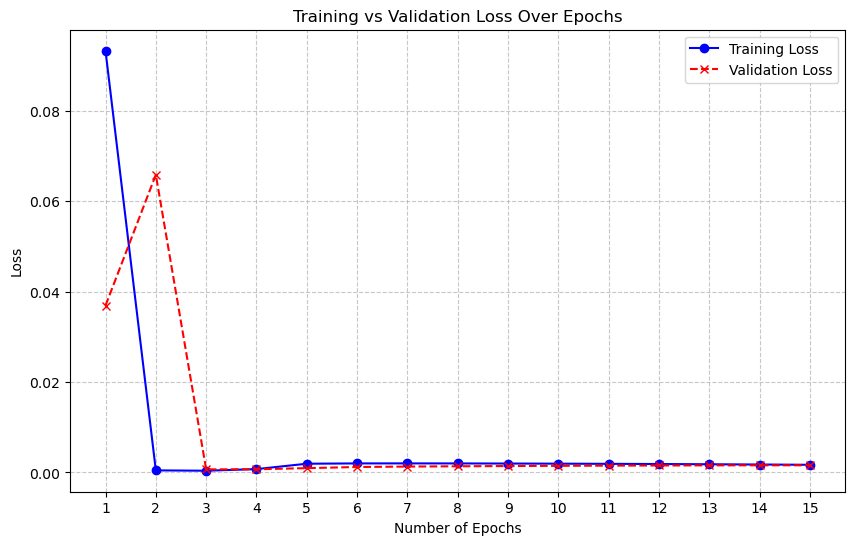



-------------------------------------------------------------------------------
Learning rate:  0.000703    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.147786).  Saving model ...
Epoch 10/150, Training Loss: 0.068654, Validation Loss: 0.006126
Validation loss decreased (0.147786 --> 0.011679).  Saving model ...
Epoch 20/150, Training Loss: 0.042617, Validation Loss: 0.000617
Validation loss decreased (0.011679 --> 0.001484).  Saving model ...
Epoch 30/150, Training Loss: 0.000726, Validation Loss: 0.000523
Validation loss decreased (0.001484 --> 0.001160).  Saving model ...
Epoch 40/150, Training Loss: 0.000681, Validation Loss: 0.000537
Validation loss decreased (0.001160 --> 0.001091).  Saving model ...
Epoch 50/150, Training Loss: 0.000713, 

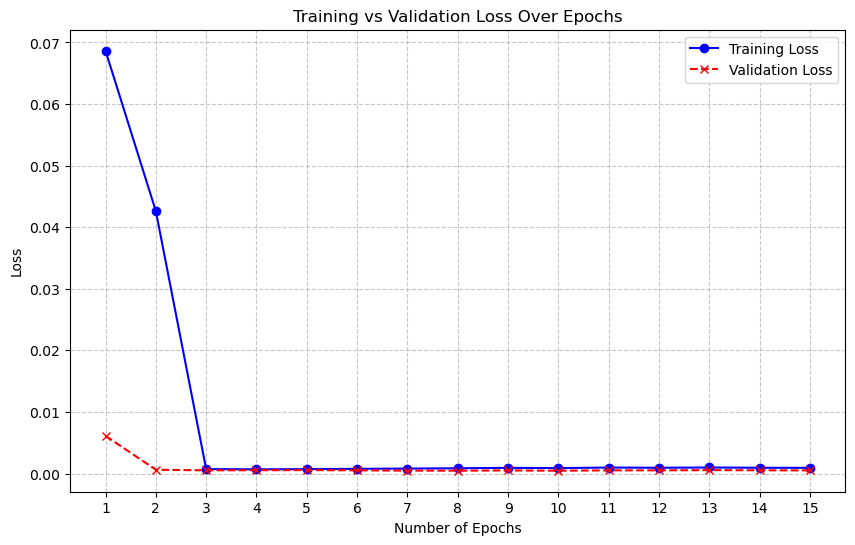



-------------------------------------------------------------------------------
Learning rate:  0.000802    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.406358).  Saving model ...
Epoch 10/150, Training Loss: 0.116965, Validation Loss: 0.748009
Validation loss decreased (0.406358 --> 0.073945).  Saving model ...
Epoch 20/150, Training Loss: 0.148068, Validation Loss: 0.035601
Epoch 30/150, Training Loss: 0.010003, Validation Loss: 0.098049
Validation loss decreased (0.073945 --> 0.038461).  Saving model ...
Epoch 40/150, Training Loss: 0.008014, Validation Loss: 0.039519
Epoch 50/150, Training Loss: 0.005592, Validation Loss: 0.058324
Epoch 60/150, Training Loss: 0.003249, Validation Loss: 0.038875
Validation loss decreased (0.038461 --> 0.01862

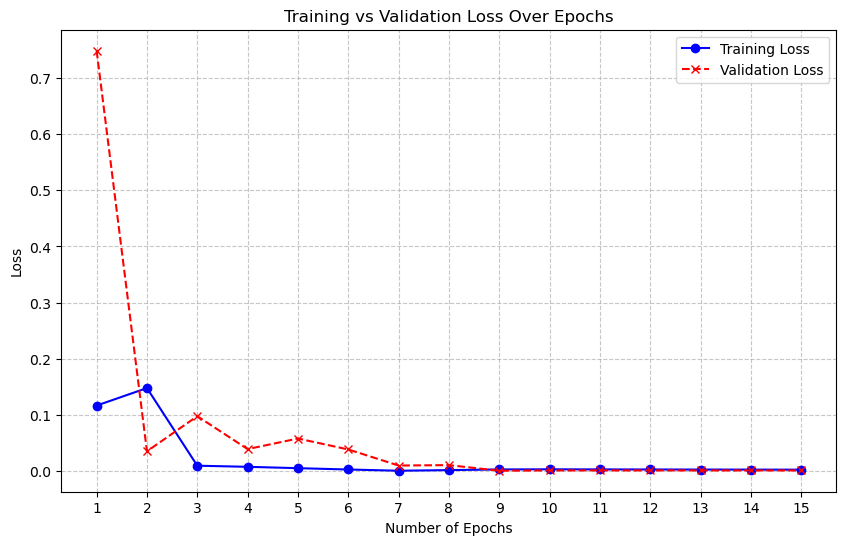



-------------------------------------------------------------------------------
Learning rate:  0.000901    Loop:  1
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 1.274299).  Saving model ...
Epoch 10/150, Training Loss: 0.054021, Validation Loss: 1.330452
Validation loss decreased (1.274299 --> 0.039515).  Saving model ...
Epoch 20/150, Training Loss: 0.002084, Validation Loss: 0.033797
Epoch 30/150, Training Loss: 0.003372, Validation Loss: 0.160838
Validation loss decreased (0.039515 --> 0.005742).  Saving model ...
Epoch 40/150, Training Loss: 0.002855, Validation Loss: 0.001622
Epoch 50/150, Training Loss: 0.004755, Validation Loss: 0.002357
Epoch 60/150, Training Loss: 0.005028, Validation Loss: 0.002801
Epoch 70/150, Training Loss: 0.005127, Validati

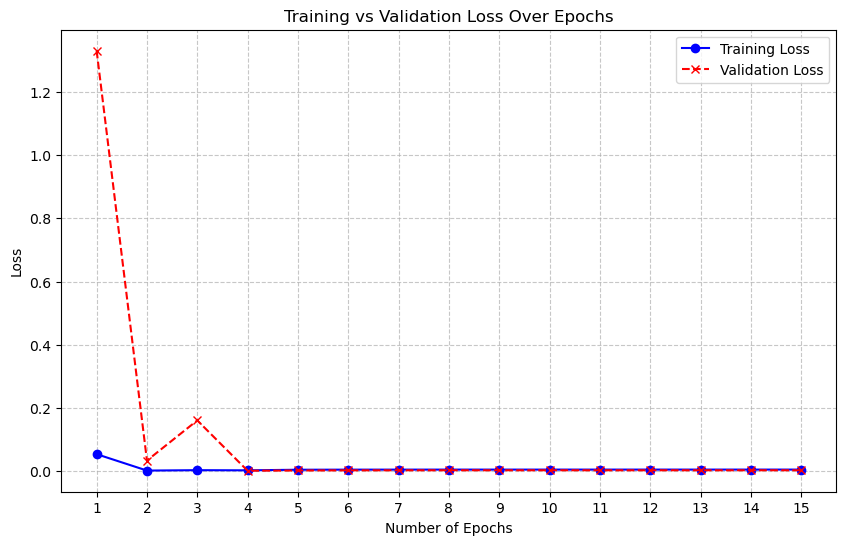



Best learning rate:  1e-05    Loss:  tensor(1.4799e-06, device='cuda:0', grad_fn=<MseLossBackward0>)
Second best learning rate:  1e-05    Loss:  tensor(1.4855e-06, device='cuda:0', grad_fn=<MseLossBackward0>)


In [19]:
skip_this_step = False

if not skip_this_step:
    learning_rate_list = []
    difference_of_lr = best_lr[0][1] - best_lr[1][1]
    number_of_increments = 10
    increment = difference_of_lr / number_of_increments

    for i in range(number_of_increments):
        learning_rate_list.append(best_lr[0][1] - increment * i)

    for lr in learning_rate_list:
        print("\n\n-------------------------------------------------------------------------------")
        print("Learning rate: ", lr, "   Loop: ", repeated_loops_per_lr)
        print(stock_name, "Time interval ", stock_interval, "min", "Time period: ", stock_period, 'months')
        print("Batch size: ", batch_size, "Number of workers: ", num_workers, "Epochs: ", epochs)
        print("Learning rate scheduler rate: ", lr_scheduler_rate)
        print("Beta1: ", beta1, "Beta2: ", beta2)
        print("-------------------------------------------------------------------------------")

        
        rnnSetup = RNN_initializer(retrieve=True, name=stock_name, recomp=True, nval=1, ival=[5, "m"], pval=[7,"d"],sequence_len=sequence_len,
            batch_size=batch_size, num_workers=num_workers, epochs=epochs, learning_rate=lr, lr_scheduler_rate=lr_scheduler_rate, beta1=beta1, beta2=beta2)
        for i in range(repeated_loops_per_lr):
            training_loss_array = []
            validation_loss_array = []
            rnn = rnnSetup.init_RNN()
            loss = rnnSetup.trainAndTest(rnn)
            if best_lr_in_loop > loss:
                best_lr_in_loop = loss

        if best_lr_in_loop < best_lr[0][0]:
            best_lr[1] = best_lr[0]
            best_lr[0] = [best_lr_in_loop, lr]
        elif best_lr_in_loop < best_lr[1][0]:
            best_lr[1] = [best_lr_in_loop, lr]

        best_lr_in_loop = np.inf


        plot_loss(training_loss_array, validation_loss_array, epochs)


    print("\n\nBest learning rate: ", best_lr[0][1], "   Loss: ", best_lr[0][0])
    print("Second best learning rate: ", best_lr[1][1], "   Loss: ", best_lr[1][0])

skip_this_step = False

In [20]:
#Stock variables when using yahoo finance api
if stock_data_source == "yahoo":
    stock_name = "AMD"
    stock_interval="5m"
    stock_period="7d"
    epochs = 100
    lr_scheduler_rate = 0.8
    beta1 = 0.9
    beta2 = 0.999

#Stock variables when using alpaca api
if stock_data_source == "alpaca":
    stock_name = "AMD"
    stock_interval="15"
    stock_period="12" #months
    epochs = 150
    lr_scheduler_rate = 0.1
    beta1 = 0.90
    beta2 = 0.999

batch_size = 16
num_workers = 0



-------------------------------------------------------------------------------
Learning rate:  0.00018    Loop:  3
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.170814).  Saving model ...
Epoch 10/150, Training Loss: 0.096025, Validation Loss: 0.238319
Validation loss decreased (0.170814 --> 0.009054).  Saving model ...
Epoch 20/150, Training Loss: 0.021557, Validation Loss: 0.000870
Validation loss decreased (0.009054 --> 0.002499).  Saving model ...
Epoch 30/150, Training Loss: 0.001474, Validation Loss: 0.001391
Validation loss decreased (0.002499 --> 0.001681).  Saving model ...
Epoch 40/150, Training Loss: 0.001277, Validation Loss: 0.000637
Validation loss decreased (0.001681 --> 0.001352).  Saving model ...
Epoch 50/150, Training Loss: 0.001178, V

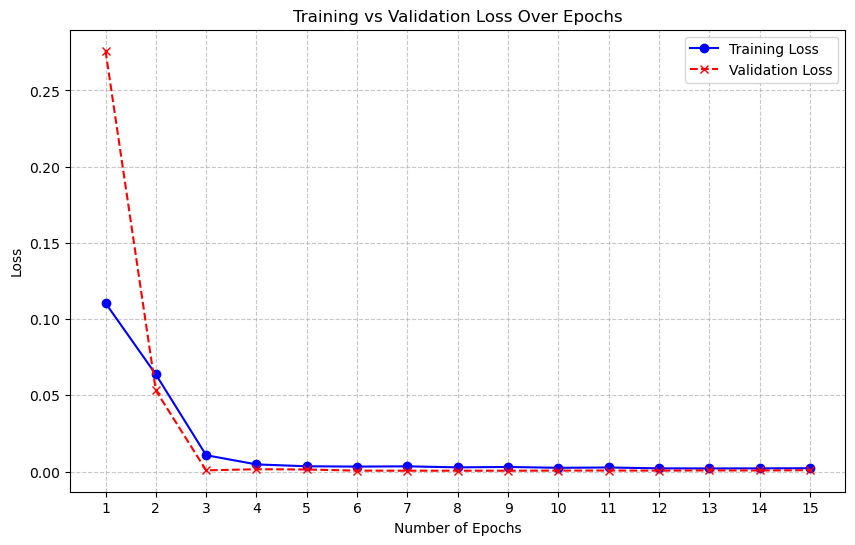



-------------------------------------------------------------------------------
Learning rate:  0.00016    Loop:  3
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.144466).  Saving model ...
Epoch 10/150, Training Loss: 0.098468, Validation Loss: 0.180699
Validation loss decreased (0.144466 --> 0.005755).  Saving model ...
Epoch 20/150, Training Loss: 0.016426, Validation Loss: 0.000323
Validation loss decreased (0.005755 --> 0.001762).  Saving model ...
Epoch 30/150, Training Loss: 0.000996, Validation Loss: 0.000450
Validation loss decreased (0.001762 --> 0.001453).  Saving model ...
Epoch 40/150, Training Loss: 0.001050, Validation Loss: 0.000280
Validation loss decreased (0.001453 --> 0.001241).  Saving model ...
Epoch 50/150, Training Loss: 0.001011, V

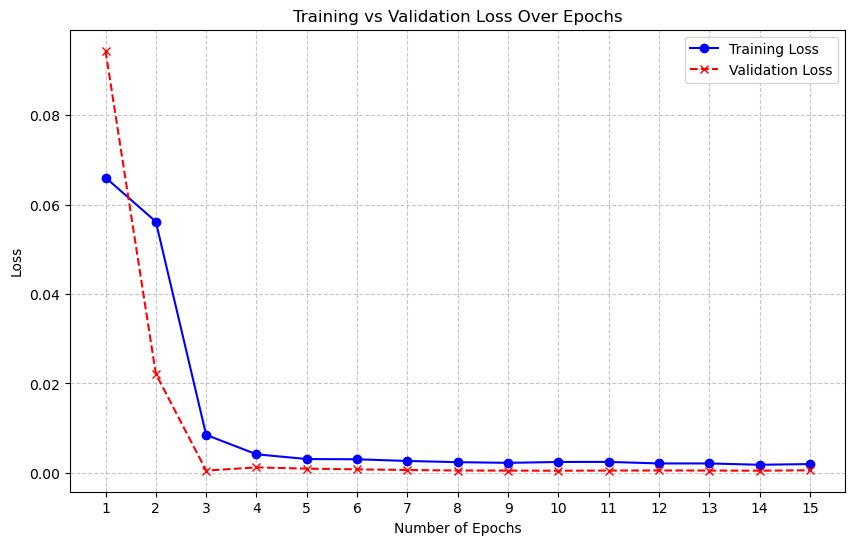



-------------------------------------------------------------------------------
Learning rate:  0.00014    Loop:  3
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.087308).  Saving model ...
Epoch 10/150, Training Loss: 0.061660, Validation Loss: 0.110300
Validation loss decreased (0.087308 --> 0.043294).  Saving model ...
Epoch 20/150, Training Loss: 0.043479, Validation Loss: 0.031633
Validation loss decreased (0.043294 --> 0.005257).  Saving model ...
Epoch 30/150, Training Loss: 0.004907, Validation Loss: 0.000363
Validation loss decreased (0.005257 --> 0.003329).  Saving model ...
Epoch 40/150, Training Loss: 0.003322, Validation Loss: 0.000880
Validation loss decreased (0.003329 --> 0.002504).  Saving model ...
Epoch 50/150, Training Loss: 0.002958, V

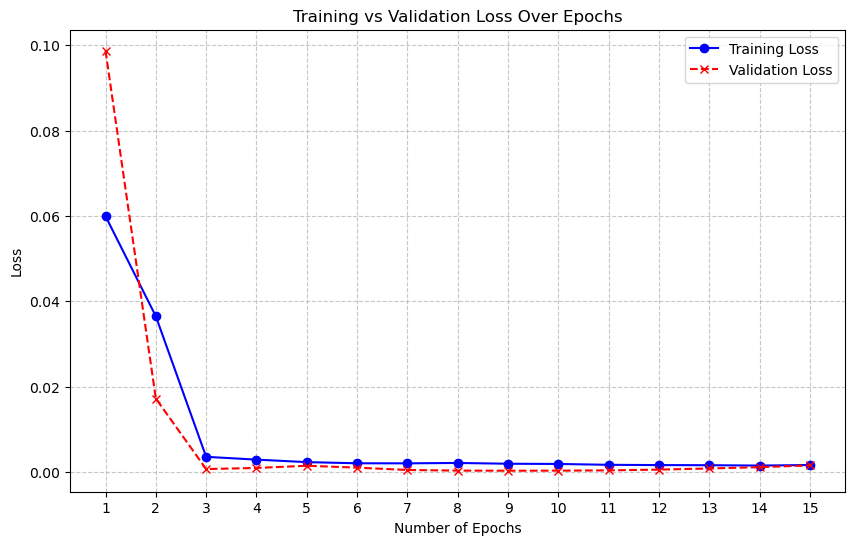



-------------------------------------------------------------------------------
Learning rate:  0.00012    Loop:  3
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.9 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 0.033063).  Saving model ...
Epoch 10/150, Training Loss: 0.024063, Validation Loss: 0.038295
Validation loss decreased (0.033063 --> 0.018742).  Saving model ...
Epoch 20/150, Training Loss: 0.018177, Validation Loss: 0.012468
Validation loss decreased (0.018742 --> 0.004452).  Saving model ...
Epoch 30/150, Training Loss: 0.002551, Validation Loss: 0.000638
Validation loss decreased (0.004452 --> 0.002495).  Saving model ...
Epoch 40/150, Training Loss: 0.002671, Validation Loss: 0.000612
Validation loss decreased (0.002495 --> 0.001730).  Saving model ...
Epoch 50/150, Training Loss: 0.002579, V

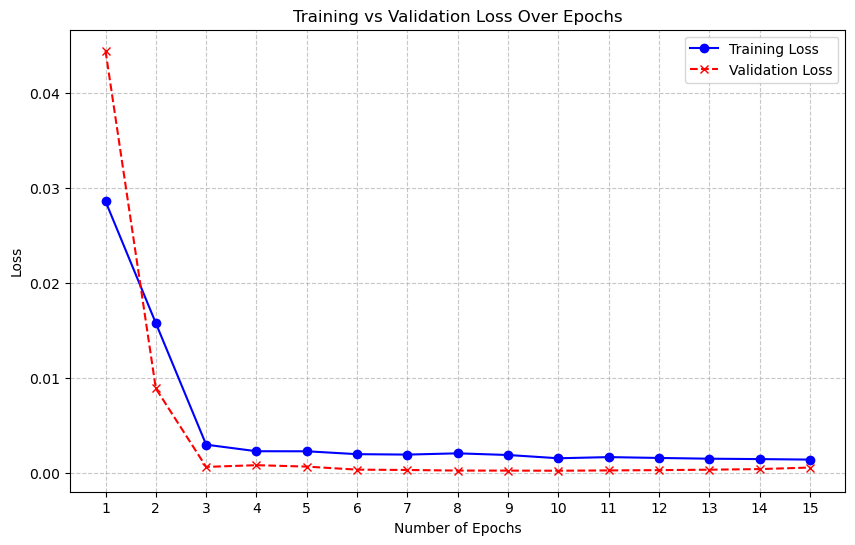

In [21]:
skip_this_step = False

if not skip_this_step:
    #test previous god perfoming rates learning rates
    learning_rate_list = [0.00018, 0.00016, 0.00014, 0.00012]
    best_lr = [[np.inf, np.inf] , [np.inf, np.inf]] #record two pairs of [loss, learning rate] to tune learning rate later
    best_lr_in_loop = np.inf
    repeated_loops_per_lr = 3

    for lr in learning_rate_list:
        print("\n\n-------------------------------------------------------------------------------")
        print("Learning rate: ", lr, "   Loop: ", repeated_loops_per_lr)
        print(stock_name, "Time interval ", stock_interval, "min", "Time period: ", stock_period, 'months')
        print("Batch size: ", batch_size, "Number of workers: ", num_workers, "Epochs: ", epochs)
        print("Learning rate scheduler rate: ", lr_scheduler_rate)
        print("Beta1: ", beta1, "Beta2: ", beta2)
        print("-------------------------------------------------------------------------------")
        rnnSetup = RNN_initializer(retrieve=True, name=stock_name, recomp=True, nval=1, ival=[5, "m"], pval=[7,"d"],sequence_len=seq, batch_size=batch_size, 
            num_workers=num_workers, epochs=epochs, learning_rate=lr, lr_scheduler_rate=lr_scheduler_rate, beta1=beta1, beta2=beta2)
        for i in range(repeated_loops_per_lr):
            training_loss_array = []
            validation_loss_array = []
            rnn = rnnSetup.init_RNN()
            loss = rnnSetup.trainAndTest(rnn)
            if best_lr_in_loop > loss:
                best_lr_in_loop = loss

        if best_lr_in_loop < best_lr[0][0]:
            best_lr[1] = best_lr[0]
            best_lr[0] = [best_lr_in_loop, lr]
        elif best_lr_in_loop < best_lr[1][0]:
            best_lr[1] = [best_lr_in_loop, lr]

        plot_loss(training_loss_array, validation_loss_array, epochs)

skip_this_step = False

In [22]:
#Stock variables when using yahoo finance api
if stock_data_source == "yahoo":
    stock_name = "AMD"
    stock_interval="5m"
    stock_period="7d"
    epochs = 100
    lr_scheduler_rate = 0.8
    beta1 = 0.9
    beta2 = 0.999

#Stock variables when using alpaca api
if stock_data_source == "alpaca":
    stock_name = "AMD"
    stock_interval="15"
    stock_period="12" #months
    epochs = 150
    lr_scheduler_rate = 0.1
    beta1 = 0.95
    beta2 = 0.999

batch_size = 16
num_workers = 0



-------------------------------------------------------------------------------
Learning rate:  0.00042    Loop:  3
AMD Time interval  15 min Time period:  12 months
Batch size:  16 Number of workers:  0 Epochs:  150
Learning rate scheduler rate:  0.1
Beta1:  0.95 Beta2:  0.999
-------------------------------------------------------------------------------
Validation loss decreased (inf --> 2.950378).  Saving model ...
Epoch 10/150, Training Loss: 0.676537, Validation Loss: 3.175856
Validation loss decreased (2.950378 --> 0.562834).  Saving model ...
Epoch 20/150, Training Loss: 0.073022, Validation Loss: 0.498433
Validation loss decreased (0.562834 --> 0.275102).  Saving model ...
Epoch 30/150, Training Loss: 0.411505, Validation Loss: 0.109600
Validation loss decreased (0.275102 --> 0.244096).  Saving model ...
Epoch 40/150, Training Loss: 0.849019, Validation Loss: 0.003041
Epoch 50/150, Training Loss: 0.888382, Validation Loss: 0.001387
Epoch 60/150, Training Loss: 0.892525, Vali

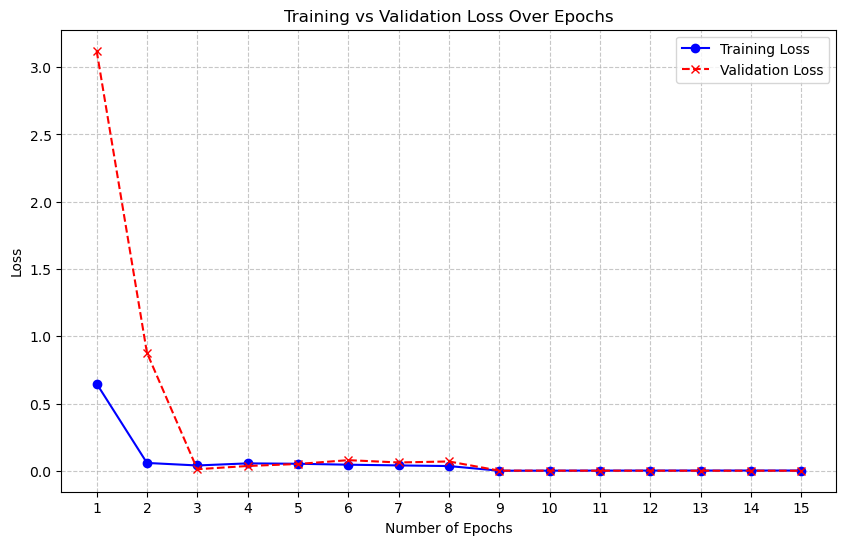

In [23]:
skip_this_step = False

if not skip_this_step:
    #test previous god perfoming rates learning rates
    learning_rate_list = [0.00042]
    best_lr = [[np.inf, np.inf] , [np.inf, np.inf]] #record two pairs of [loss, learning rate] to tune learning rate later
    best_lr_in_loop = np.inf
    repeated_loops_per_lr = 3

    for lr in learning_rate_list:
        print("\n\n-------------------------------------------------------------------------------")
        print("Learning rate: ", lr, "   Loop: ", repeated_loops_per_lr)
        print(stock_name, "Time interval ", stock_interval, "min", "Time period: ", stock_period, 'months')
        print("Batch size: ", batch_size, "Number of workers: ", num_workers, "Epochs: ", epochs)
        print("Learning rate scheduler rate: ", lr_scheduler_rate)
        print("Beta1: ", beta1, "Beta2: ", beta2)
        print("-------------------------------------------------------------------------------")
        rnnSetup = RNN_initializer(retrieve=True, name=stock_name, recomp=True, nval=1, ival=[5, "m"], pval=[7,"d"], batch_size=batch_size, sequence_len=sequence_len,
            num_workers=num_workers, epochs=epochs, learning_rate=lr, lr_scheduler_rate=lr_scheduler_rate, beta1=beta1, beta2=beta2)
        for i in range(repeated_loops_per_lr):
            training_loss_array = []
            validation_loss_array = []
            rnn = rnnSetup.init_RNN()
            loss = rnnSetup.trainAndTest(rnn)
            if best_lr_in_loop > loss:
                best_lr_in_loop = loss

        if best_lr_in_loop < best_lr[0][0]:
            best_lr[1] = best_lr[0]
            best_lr[0] = [best_lr_in_loop, lr]
        elif best_lr_in_loop < best_lr[1][0]:
            best_lr[1] = [best_lr_in_loop, lr]

        plot_loss(training_loss_array, validation_loss_array, epochs)

skip_this_step = False

In [24]:
#output,hidden = rnn1(price_tensor)
#print(output.shape)  # (1, 1, 128)
#print(hidden.shape)  # (2, 1, 128)
  # Predict 1 value from hidden_size=128

#prediction = fc(output[:, -1, :])  # Take output at last time step
#print(prediction)

## Test the Trained Network
---
Test your trained model on previously unseen data! Remember we have downloaded `train_data` and `test_data`. We will use `test_data` through `test_loader`.

A "good" result will be a CNN that gets around 70% (or more, try your best!) accuracy on these test images.

The following is working code, but you are encouraged to make your own adjustments and enhance the implementation.

### Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)
---
Decide on a loss and optimization function that is best suited for this classification task. The linked code examples from above, may be a good starting point; [this PyTorch classification example](https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py) Pay close attention to the value for **learning rate** as this value determines how your model converges to a small error.

The following is working code, but you can make your own adjustments.

**TODO**: try to compare with ADAM optimizer

In [25]:
#error = nn.MSELoss()
#optimizer = torch.optim.Adam(prediction.parameters(), lr=0.001)

#epochs = 50
#for epoch in range(epochs):
#    rnn1.train()
#    fc.train()
    
#      output,hidden = rnn1(price_tensor)
#    prediction = fc(output[:, -1, :])
#    loss = error(prediction, y_tensor)
    
#    optimizer.zero_grad()
#    loss.backward()
#    optimizer.step()

#    if (epoch+1) % 10 == 0:
#        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")

In [26]:
test_loss = 0.0
value_correct = 0
error = nn.MSELoss()


bestRNN_lr[0].eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(bestRNN_lr_Setup[0].test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = bestRNN_lr[0](data)
    # calculate the batch loss
    loss = error(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # compare predictions to true label
    correct_tensor = output.eq(target.data.view_as(output))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    value_correct += 1
        
# average test loss
test_loss = test_loss/len(bestRNN_lr_Setup[0].test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))
print('Test Accuracy: %2d%% (%2d/%2d)' % (test_loss,
    value_correct, len(bestRNN_lr_Setup[0].test_loader.dataset)))

Test Loss: 0.000891

Test Accuracy:  0% (195/3120)




-------------------------------------------------------------------------------
Target Values vs Predicted Values: 
Stock:  AMD
Batch size:  16
Target Values  [-0.48688235878944397, -0.4816160500049591, -0.5249276757240295, -0.5283729434013367, -0.5273885726928711, -0.5303416848182678, -0.5303416848182678, -0.5303367376327515, -0.5264042615890503, -0.5268964171409607, -0.5332947373390198, -0.5323103666305542, -0.5268964171409607, -0.5318182110786438, -0.5337868928909302, -0.5362477898597717]
Output Values  [-0.47842198610305786, -0.4794872999191284, -0.4806431531906128, -0.5077285766601562, -0.5216863751411438, -0.521125078201294, -0.5252712965011597, -0.5262125730514526, -0.526124119758606, -0.5235755443572998, -0.5229284167289734, -0.5275026559829712, -0.5282062888145447, -0.524188756942749, -0.5265874862670898, -0.5291799902915955]
Test Loss:  0.0008909540226084527
-------------------------------------------------------------------------------


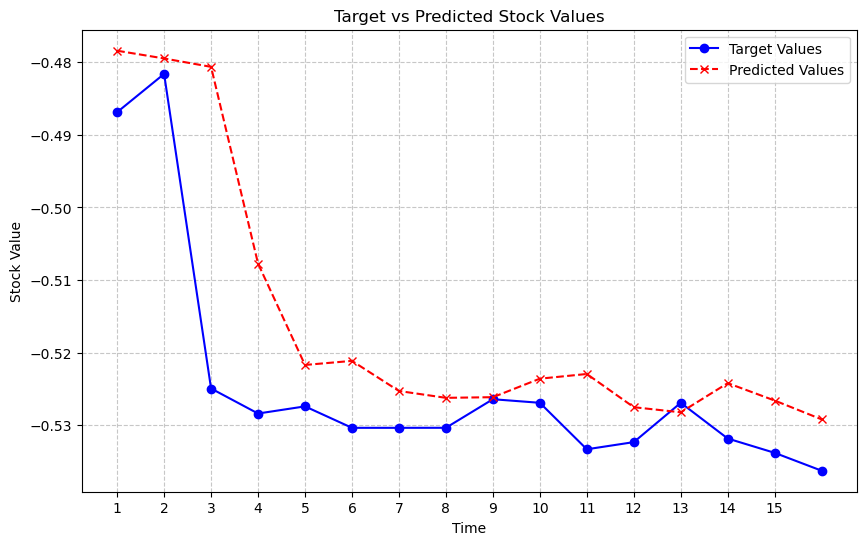

In [27]:
target_array = []
output_array = []
for i in target:
    target_array.append(i.item())
for i in output:
    output_array.append(i.item())

print("\n\n-------------------------------------------------------------------------------")
print("Target Values vs Predicted Values: ")
print("Stock: ", stock_name)
print("Batch size: ", batch_size)
print("Target Values ", target_array)
print("Output Values ", output_array)
print("Test Loss: ", test_loss)
print("-------------------------------------------------------------------------------")

plot_target_vs_predicted_values(target_array, output_array, batch_size)



-------------------------------------------------------------------------------
Normalized mean target values and predicted values to equal 0: 
Shifted predicted values 1 to the left
Target differnce of begining and end stock price: $ -0.04936543107032776
Predicted differnce of begining and end stock price: $ -0.04969269037246704
-------------------------------------------------------------------------------


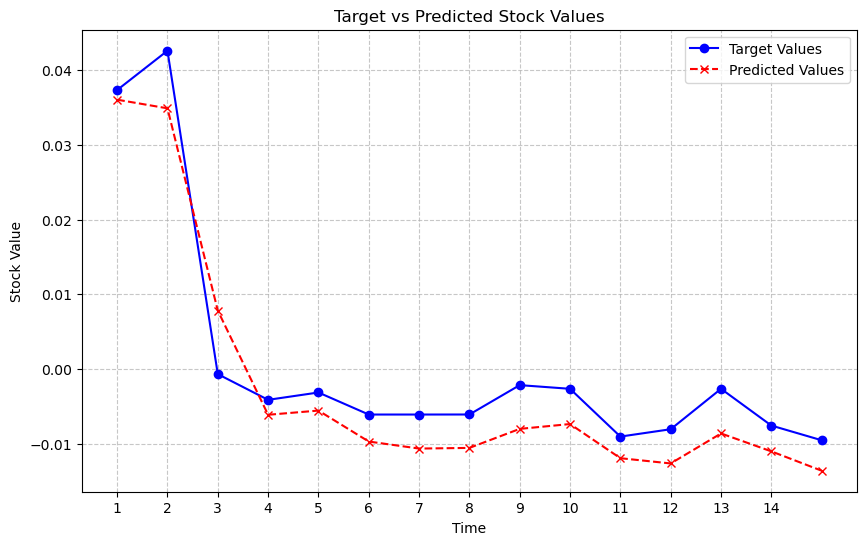

In [28]:
target_array = []
output_array = []
for i in target:
    target_array.append(i.item())
for i in output:
    output_array.append(i.item())

target_sum = 0
for i in target_array:
    target_sum += i
target_average = target_sum / len(target_array)

for i in range(len(target_array)):
    target_array[i] -= target_average

output_sum = 0
for i in output_array:
    output_sum += i
output_average = output_sum / len(output_array)

for i in range(len(output_array)):
    output_array[i] -= output_average

for i in range(len(output_array) - 1):
    output_array[i] = output_array[i + 1]

print("\n\n-------------------------------------------------------------------------------")
print("Normalized mean target values and predicted values to equal 0: ")
print("Shifted predicted values 1 to the left")
print("Target differnce of begining and end stock price: $", target_array[-1] - target_array[0])
print("Predicted differnce of begining and end stock price: $", output_array[-1] - output_array[0])
print("-------------------------------------------------------------------------------")



plot_target_vs_predicted_values(target_array[0:batch_size-1], output_array[0:batch_size-1], batch_size - 1)



tensor([0.1808, 0.1780, 0.1813, 0.2117, 0.2381, 0.2462, 0.2345, 0.2392, 0.2425,
        0.2396, 0.2423, 0.2288, 0.2298, 0.2343, 0.2056, 0.2051],
       device='cuda:0', grad_fn=<SqueezeBackward1>)
tensor([0.1735, 0.1784, 0.2202, 0.2424, 0.2463, 0.2256, 0.2379, 0.2375, 0.2355,
        0.2389, 0.2188, 0.2276, 0.2301, 0.1907, 0.2035, 0.2084],
       device='cuda:0')
Output shape: torch.Size([16])
Target shape: torch.Size([16])
Test Loss: 0.000913



-------------------------------------------------------------------------------
Target Values vs Predicted Values: 
Stock:  AMD
Batch size:  16
Target Values  [0.1734728366136551, 0.178394615650177, 0.22022974491119385, 0.24237774312496185, 0.24631516635417938, 0.22564369440078735, 0.23794814944267273, 0.23745596408843994, 0.23548725247383118, 0.2389325052499771, 0.21875320374965668, 0.22761240601539612, 0.23007330298423767, 0.19069905579090118, 0.20349569618701935, 0.20841747522354126]
Output Values  [0.18078464269638062, 0.1779826581478119, 

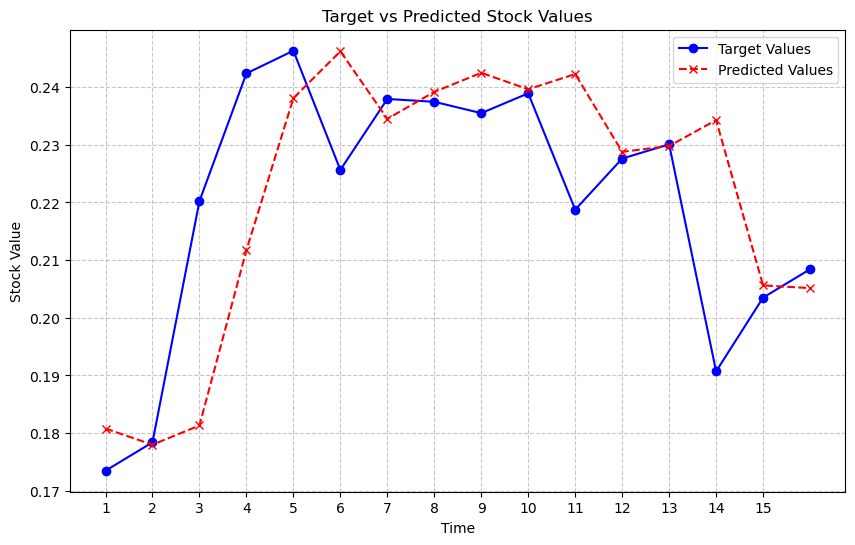



-------------------------------------------------------------------------------
Normalized mean target values and predicted values to equal 0: 
Shifted predicted values 1 to the left
Target differnce of begining and end stock price: $ 0.03494463860988617
Predicted differnce of begining and end stock price: $ 0.02716130018234253
-------------------------------------------------------------------------------


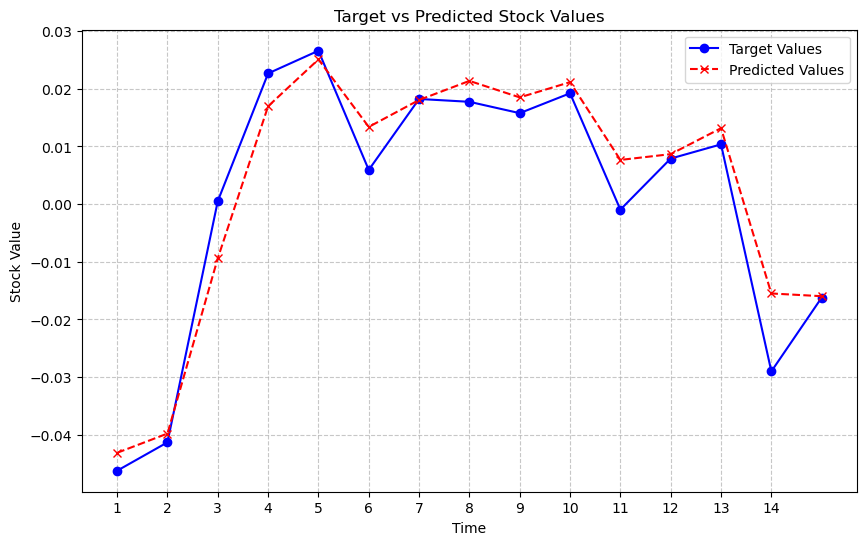

In [29]:
total_loss = 0
#iterate over test data
test_data = iter(bestRNN_lr_Setup[0].test_loader)
data, target = next(test_data)
if train_on_gpu:
    data, target = data.cuda(), target.cuda()
#forward pass: compute predicted outputs by passing inputs to the model
output = bestRNN_lr[0](data)
print(output)
print(target)
print("Output shape:", output.shape)
print("Target shape:", target.shape)
#calculate the batch loss
loss = error(output, target)
#update test loss
total_loss += loss.item()
test_loss += loss.item()/batch_size
#calculate test accuracy for each object class
#value_correct += 1

#average test loss
#test_loss = test_loss/len(bestRNN[0].test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

target_array = []
output_array = []
for i in target:
    target_array.append(i.item())
for i in output:
    output_array.append(i.item())

print("\n\n-------------------------------------------------------------------------------")
print("Target Values vs Predicted Values: ")
print("Stock: ", stock_name)
print("Batch size: ", batch_size)
print("Target Values ", target_array)
print("Output Values ", output_array)
print("Test Loss: ", test_loss)
print("-------------------------------------------------------------------------------")

plot_target_vs_predicted_values(target_array, output_array, batch_size)

target_array = []
output_array = []
for i in target:
    target_array.append(i.item())
for i in output:
    output_array.append(i.item())

target_sum = 0
for i in target_array:
    target_sum += i
target_average = target_sum / len(target_array)

for i in range(len(target_array)):
    target_array[i] -= target_average

output_sum = 0
for i in output_array:
    output_sum += i
output_average = output_sum / len(output_array)

for i in range(len(output_array)):
    output_array[i] -= output_average

for i in range(len(output_array) - 1):
    output_array[i] = output_array[i + 1]

print("\n\n-------------------------------------------------------------------------------")
print("Normalized mean target values and predicted values to equal 0: ")
print("Shifted predicted values 1 to the left")
print("Target differnce of begining and end stock price: $", target_array[-1] - target_array[0])
print("Predicted differnce of begining and end stock price: $", output_array[-1] - output_array[0])
print("-------------------------------------------------------------------------------")



plot_target_vs_predicted_values(target_array[0:batch_size-1], output_array[0:batch_size-1], batch_size - 1)
